In [1]:
cd("/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models")
include(join([pwd(), "/function_library/file_modules.jl"]))
refresh_tools("function_library")

Refreshed (2021-02-06_1628) GLMNet_tools.jl auto_pull_matlabdatasets.jl cluster_modules.jl feedback_modules.jl file_modules.jl math_modules.jl modeling_tools.jl plotting_tools.jl probabilistic_modules.jl 

# The concern is that the logit model (due to downsampling the no-lick state) does not extract the true p(move|DA) 

### it needs to be corrected for the probability of moving at any given time.

To me, it seems applying a reasonable prior (like the p(lick state) as a multiplier to p_model) would be the way to estimate the true p(move|DA) at any given time for our simulation.

However, John is worried this isn't a reasonable correction. So, let's see how this compares to extracting the true probability data from the session data...

In [4]:
ENV["COLUMNS"]=1000
path = "/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions/b5_SNc_13"
df = extract_data_with_baselineandLOI(path, normalize=true)
df[1:5, :]

truncating data back: -0.15s


,DataID,TrialNo,X,Y,LickTime,Time2Lick,PcInterval,LickTime_1back,LickTime_2back,Mean_Baseline,Median_Baseline,Mean_LOI,Median_LOI,Rxn_1back,Early_1back,Reward_1back,ITI_1back,Rxn_2back,Early_2back,Reward_2back,ITI_2back,LickState,Yshuffle,SessionCode,Path
,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Float64,String,String
1,1,1,0.0,0.164951,0.0752584,0.0745934,0.0,0.0,0.0,0.249587,0.270886,0.180347,0.187772,0,0,0,0,0,0,0,0,0,0.393027,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions/b5_SNc_13/singletrial
2,2,1,0.01,0.164327,0.0752584,0.0739713,0.0074129,0.0,0.0,0.249587,0.270886,0.180347,0.187772,0,0,0,0,0,0,0,0,0,0.274068,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions/b5_SNc_13/singletrial
3,3,1,0.02,0.163875,0.0752584,0.0733492,0.0148258,0.0,0.0,0.249587,0.270886,0.180347,0.187772,0,0,0,0,0,0,0,0,0,0.284161,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions/b5_SNc_13/singletrial
4,4,1,0.03,0.163799,0.0752584,0.072727,0.0222387,0.0,0.0,0.249587,0.270886,0.180347,0.187772,0,0,0,0,0,0,0,0,0,0.321128,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions/b5_SNc_13/singletrial
5,5,1,0.04,0.164287,0.0752584,0.0721049,0.0296516,0.0,0.0,0.249587,0.270886,0.180347,0.187772,0,0,0,0,0,0,0,0,0,0.208235,b5SNc13,/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions/b5_SNc_13/singletrial


Let's bin up the calcium signals by lick state...

In [180]:
function bin_compare_lick_state_by_signal(df; binwidth=0.001, X::Symbol=:Y, Y::Symbol=:LickState, nbins=50, yl=[0,100], xl=[0,0.04])
    low_state_idx=findall(x->x==false, df[Y])
    high_state_idx=findall(x->x==true, df[Y])
    low_state_signals=df[low_state_idx, X]
    high_state_signals=df[high_state_idx, X]
    
    mn = minimum(vcat(low_state_signals, high_state_signals))
    mx = maximum(vcat(low_state_signals, high_state_signals))
    edges = range(mn-binwidth, stop=mx+binwidth, step=binwidth)
    
    
    low_signals_binned = fit(Histogram, Float64.(low_state_signals), edges)
    low_weights = low_signals_binned.weights
    high_signals_binned = fit(Histogram, Float64.(high_state_signals), edges)
    high_weights = high_signals_binned.weights
    
    p = high_weights ./ (high_weights .+ low_weights)
    
    plot_edges = edges[1:end-1] .+ (edges[2:end] .- edges[1:end-1])./2
    
    println(size(plot_edges))
    println(size(p))
    
    figure(figsize=(10,3))
    subplot(1,2,1)
    plot(plot_edges, p)
    ylim([0, 0.015])
    xlim([0, 0.6])
    title("p(move|signal)")
    ylabel("p(move|signal)")
    xlabel("signal")
    subplot(1,2,2)
    pp = p[findall(x->!isnan(x),p)]
    pp = nan2zero(p)
    render_distribution(pp, "p(move|signal)", t="p(move|signal)", bins=nbins, ax=gca(), normalization="none",histtype="bar")
#     println(mean(pp[2:end].-pp[1:end-1]))
    xticks(0:0.01:0.04)
    xlim(xl)
    ylim(yl)
    ylabel("number of p(move|signal)")
    
    figure(figsize=(10,3))
    subplot(1,2,1)
    render_distribution(low_state_signals, "signal", t="lows", bins=edges, ax=gca(), normalization="none",histtype="step")
#     plot(plot_edges, low_signals_binned, "b-")
    
    render_distribution(high_state_signals, "signal", t="num in state", bins=edges, ax=gca(), normalization="none",histtype="step")
    ylabel("num in state")
#     plot(plot_edges, high_signals_binned, "o-")
    
    subplot(1,2,2)
    render_distribution(low_state_signals, "signal", t="lows", bins=edges, ax=gca(),histtype="step")
#     plot(plot_edges, low_signals_binned, "b-")
    
    render_distribution(high_state_signals, "signal", t="p(state)", bins=edges, ax=gca(),histtype="step")
#     plot(plot_edges, high_signals_binned, "o-")
    return edges, pp
end

bin_compare_lick_state_by_signal (generic function with 1 method)

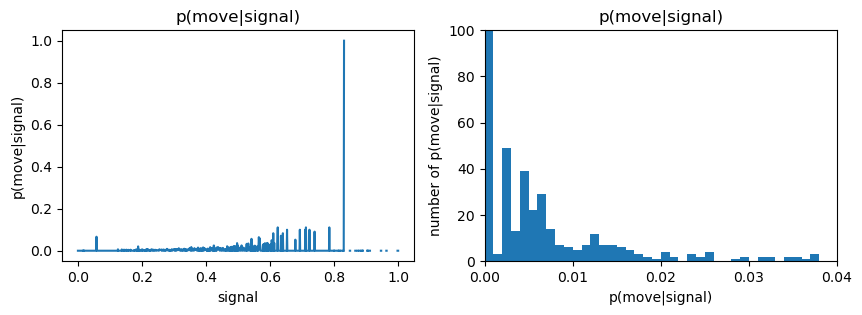

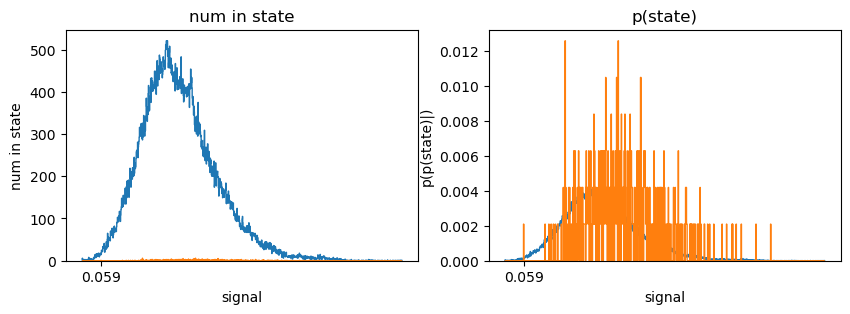

(1002,)
(1002,)


(-0.001:0.001:1.001, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [157]:
edges001, pp001 = bin_compare_lick_state_by_signal(df, binwidth=0.001, nbins=1000, yl=[0,100], xl=[0,0.04])

In [165]:
mean(pp01)

0.006722425462413558

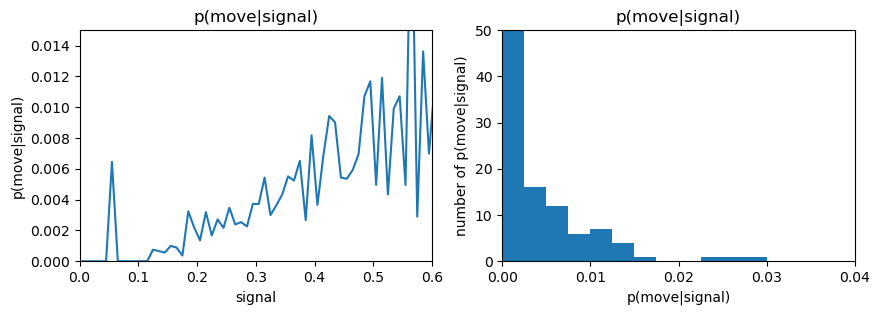

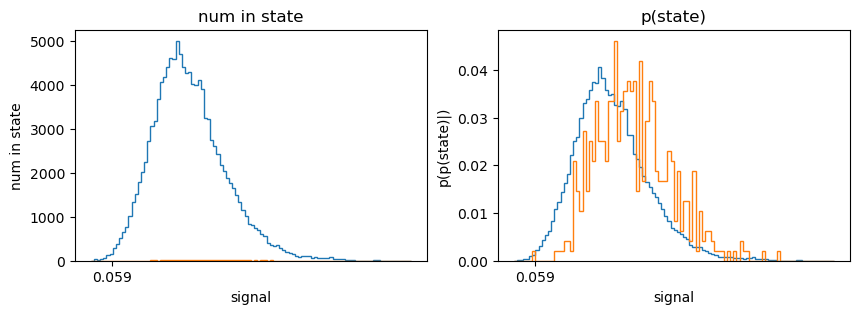

(102,)
(102,)


(-0.01:0.01:1.01, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0064516129032258064, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [181]:
edges01, pp01 = bin_compare_lick_state_by_signal(df, binwidth=0.01, nbins=100, yl=[0,50], xl=[0,0.04])


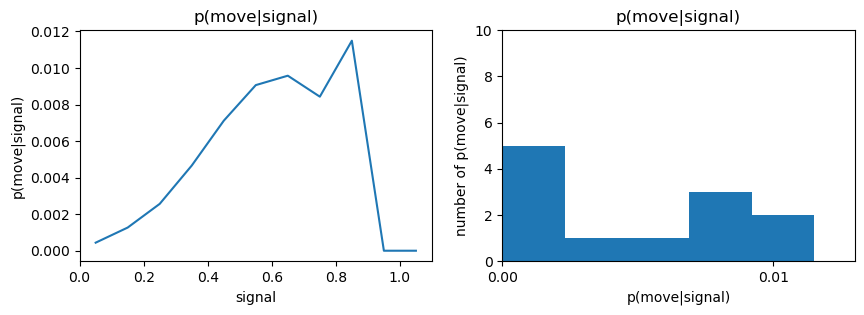

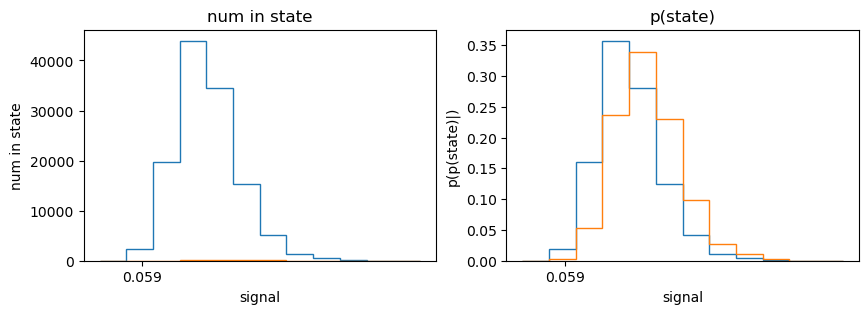

(12,)
(12,)


(-0.1:0.1:1.1, [0.0, 0.0004405286343612335, 0.0012680056806654494, 0.0025650920482146507, 0.004661333947171549, 0.007115596092890873, 0.009064609450337512, 0.009579955784819455, 0.008431703204047217, 0.011494252873563218, 0.0, 0.0])

In [130]:
edges, pp = bin_compare_lick_state_by_signal(df, binwidth=0.1, nbins=5, yl=[0,10], xl=[0,0.013])

In [132]:
function get_p_given_pfit_and_signal(signal, binedges, pfit)
    ps = []
    for i = 1:length(signal)
        # Find what the p(move|signal) should be given the signal
        b = findlast(x->x<=signal[i], binedges)
        p = pfit[b]
        push!(ps, p)
    end
    return ps
end

get_p_given_pfit_and_signal (generic function with 1 method)

In [138]:
all_p = get_p_given_pfit_and_signal(df[:Y], edges, pp)

123510-element Array{Any,1}:
 0.0012680056806654494
 0.0012680056806654494
 0.0012680056806654494
 0.0012680056806654494
 0.0012680056806654494
 0.0012680056806654494
 0.0012680056806654494
 0.0012680056806654494
 0.0012680056806654494
 0.0012680056806654494
 0.0012680056806654494
 0.0025650920482146507
 0.0025650920482146507
 ⋮
 0.004661333947171549
 0.004661333947171549
 0.004661333947171549
 0.004661333947171549
 0.004661333947171549
 0.004661333947171549
 0.004661333947171549
 0.004661333947171549
 0.004661333947171549
 0.004661333947171549
 0.004661333947171549
 0.004661333947171549

# Let's see what happens if we simulate using these probs...

In [166]:
function sim_behavior5(df, pfit, edges; showTrials=false, nsims=10, ndp_per_sample = 10, p_scaling=1.0)
    #
    #. CORRECTED THE SIMULATION
    #. This function will attempt to sample less finely... For 100ms samplingg, use 10 ndp_per_sample...
    #   But it will also average the signal over the interval 
    #      AND it will correct for uncertainty in our prob of movement...
    #
    
    X = df.X
    predictors = [:Y] # must be a vector
    println(predictors)
    # Let's get the range of probabilities the model can do on the whole dataset...
    all_p = get_p_given_pfit_and_signal(df[predictors[1]], edges, pfit)
    min_p = minimum(all_p)
    max_p = maximum(all_p)
    

    trialIDs = unique(df.TrialNo)
    movement_positions = []
    true_move_times_by_trial = []
    movement_positions_by_trial = [[] for _=1:length(trialIDs)]
    censor_count=0
    for ss = 1:nsims
        for ii =1:length(trialIDs)
            i = trialIDs[ii]
            # get the datapoints corresponding to this trial
            dps = findall(x->x==i, df.TrialNo)
            nj = ceil(Int,length(dps)/ndp_per_sample) 
            
            
            for j = 1:nj
                mn = ndp_per_sample*(j-1)+1
                mx = round(Int,minimum([ndp_per_sample*(j), length(dps)]))
                if ss==1 && j==1
                    push!(true_move_times_by_trial,df.LickTime[dps[mx]]*maximum(X)+minimum(X)+0.15)
                end
#                 println("actual lick-time=", df.LickTime[dps[mx]]*maximum(X)+minimum(X)+0.15, " current time is=",df.X[dps[mx]])
                # Average the signals within this time window...
                dpsrange = dps[mn:mx]
#                 println("dpsrange=", dpsrange)

                # make an average dataframe of this set
#                 avedf = average_df(predictors[1], dpsrange, df, yID)

                prediction_p = mean(all_p[dpsrange])

                    
                
                # look at the DA signal and predictors at that time
                # calculate its p(move | dopamine, factors) from the model 
                p = prediction_p#[1]
#                 println("    p=",p)
                
                
                
                # Let's correct this p for our uncertainty. 
                #. If it's close to min prediction on our dataset, let's set to zero. 
                #. If it's close to max set close to 1
#                 p_corrected = (p-min_p)/max_p
#                 println("    p_corrected=",p_corrected)
                #
                # Scale everything down just a bit...
                #
#                 p_corrected = p_corrected*p_scaling
#                 println("    p_scaled=",p_corrected)
#                 println("p_original=",p, " p_corrected=", p_corrected)
                
#                 state = flip(p_corrected)
                state = flip(p)
#                 println("    state=",state)
#                 println("    state=",state)
                if state
                    println("actual lick-time=", df.LickTime[dps[mx]]*maximum(X)+minimum(X)+0.15, " found lick time at=",df.X[dps[mx]]+0.15)
                    #
                    # Get the current time in the trial...
                    #
                    
#                     move_time_i = df.X[dps[j]]+0.15# add 0.15 to account for trimming back from lick.
                    move_time_i = df.X[dps[mx]]+0.15# add 0.15 to account for trimming back from lick.
                    if showTrials
                        println("     Moved at pos=", j, ", sim_licktime=", move_time_i)
                    end
                    push!(movement_positions, move_time_i)
                    push!(movement_positions_by_trial[ii], move_time_i)
                    break
                elseif !state &&j==nj
#                      println("actual lick-time=", df.LickTime[dps[mx]]*maximum(X)+minimum(X)+0.15, " But never found a lick!")
                    
                    move_time_i = 17.1
                    push!(movement_positions, move_time_i)
                    push!(movement_positions_by_trial[ii], move_time_i)
                    censor_count=censor_count+1
                    continue
                end
            end
        end
    end
#     figure(figsize=(3,3))
    extract_behavior_distribution(df)
#     xlim([0,maximum(X)])
    figure(figsize=(3,3))
#     ax=subplot(1,2,1)
    render_distribution(movement_positions, [0,1], t="simulated distribution", bins=50, ax=gca())
    xlim([0,maximum(X)])
    xticks(0:17)
    xlabel("simulated lick time")
#     ax=subplot(1,2,2)
#     render_distribution(movement_positions, [0,1], t="zoom", bins=70, ax=ax)
#     xlim([0,maximum(X)])
#     xticks(0:17)
#     xlabel("simulated lick time")
#     ylim([0,0.2])
    sim_data = (trialIDs, true_move_times_by_trial, movement_positions_by_trial)
    plot_sim_fit(sim_data)
    warning(join(["Number of censored simulated trials=", censor_count, " out of ", length(trialIDs)*nsims, "trials"]))
    return (movement_positions, sim_data,censor_count)
end
function plot_sim_fit(sim_data::Tuple)
    (trialIDs, true_move_times_by_trial, movement_positions_by_trial) = sim_data
    figure(figsize=(10,3))
    plot(trialIDs, true_move_times_by_trial, "k-",linewidth=3)
    [sort!(x) for x in movement_positions_by_trial]
    for i=1:length(trialIDs)
        xxs = trialIDs[i].*ones(length(movement_positions_by_trial[i]))
#         pretty_print_list(movement_positions_by_trial[i], orient="horizontal")
#         plot(xxs, true_move_times_by_trial[i], "r.-", alpha=0.5, linewidth=2) 
        plot(xxs, movement_positions_by_trial[i], "r.-", alpha=0.5, linewidth=2) 
    end    
end

plot_sim_fit (generic function with 1 method)

[:Y]
actual lick-time=1.4867854978443338 found lick time at=0.74
actual lick-time=1.2443334704502564 found lick time at=0.68
actual lick-time=2.675150362836499 found lick time at=2.1799999999999997
actual lick-time=3.7821313307982405 found lick time at=0.26
actual lick-time=2.2081427669776397 found lick time at=0.91
actual lick-time=1.7161401167482566 found lick time at=1.5
actual lick-time=1.06016990984824 found lick time at=0.68
actual lick-time=2.6281596606199153 found lick time at=1.4
actual lick-time=3.1629538439316343 found lick time at=0.7100000000000001
actual lick-time=3.358315188891645 found lick time at=0.59
actual lick-time=2.849415881907788 found lick time at=2.0
actual lick-time=0.24366146773722536 found lick time at=0.16
actual lick-time=1.2546314328509123 found lick time at=0.6900000000000001
actual lick-time=0.2841234617522287 found lick time at=0.24
actual lick-time=0.52314616768667 found lick time at=0.51
actual lick-time=3.121162113024119 found lick time at=1.76
act

actual lick-time=2.8433170886413808 found lick time at=2.67
actual lick-time=1.8591118277476506 found lick time at=1.63
actual lick-time=2.8340189284155457 found lick time at=0.86
actual lick-time=2.8740110154083833 found lick time at=2.31
actual lick-time=1.6890454778106092 found lick time at=1.22
actual lick-time=3.757936118167574 found lick time at=3.0
actual lick-time=3.533880450790202 found lick time at=1.3699999999999999
actual lick-time=5.039282585418087 found lick time at=1.18
actual lick-time=4.191150400517486 found lick time at=2.33
actual lick-time=4.8349230208846885 found lick time at=3.6799999999999997
actual lick-time=1.72393857371186 found lick time at=0.77
actual lick-time=1.415599582997083 found lick time at=0.63
actual lick-time=1.8283179207631657 found lick time at=1.15
actual lick-time=6.418109764713642 found lick time at=1.7799999999999998
actual lick-time=3.3328202334337114 found lick time at=0.92
actual lick-time=14.713968310290364 found lick time at=5.3800000000

actual lick-time=1.3523121053309177 found lick time at=1.3199999999999998
actual lick-time=1.8169201759702072 found lick time at=0.32
actual lick-time=3.5374797386195573 found lick time at=2.44
actual lick-time=3.195847335483243 found lick time at=1.7899999999999998
actual lick-time=2.6582537060820255 found lick time at=1.15
actual lick-time=2.8098237157848795 found lick time at=1.08
actual lick-time=3.689549649409822 found lick time at=0.7100000000000001
actual lick-time=1.5087811456903943 found lick time at=0.16999999999999998
actual lick-time=0.5977614039935566 found lick time at=0.47
actual lick-time=1.5730684255313805 found lick time at=1.27
actual lick-time=3.4629944765953975 found lick time at=1.25
actual lick-time=2.7985259512094025 found lick time at=1.3399999999999999
actual lick-time=2.818222054053375 found lick time at=2.15
actual lick-time=1.9082021145313586 found lick time at=0.62
actual lick-time=1.927798237157849 found lick time at=0.9400000000000001
actual lick-time=1.

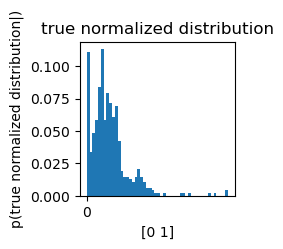

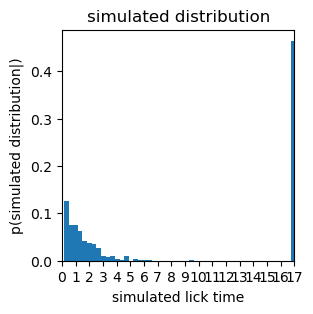

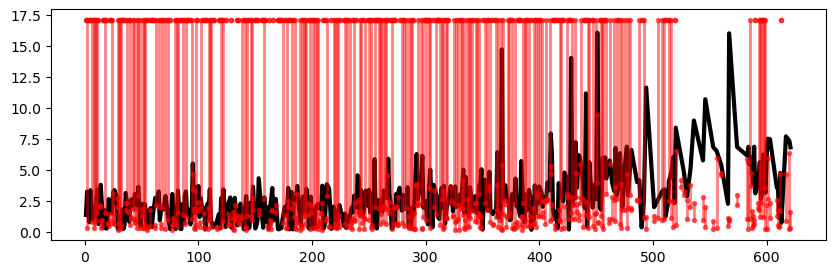

"     WARNING: Number of censored simulated trials=443 out of 954trials"


(Any[17.1, 17.1, 17.1, 17.1, 0.74, 17.1, 17.1, 0.68, 17.1, 17.1  …  2.64, 1.1099999999999999, 2.52, 1.77, 0.38, 1.65, 17.1, 0.87, 0.21, 1.5599999999999998], ([1, 2, 4, 5, 6, 7, 8, 9, 10, 11  …  601, 603, 609, 610, 611, 612, 613, 617, 620, 621], Any[1.3481129361966697, 3.2381389674781684, 0.7540004898528244, 3.3472173847511333, 1.4867854978443338, 0.9429930949592261, 2.028078395292389, 1.2443334704502564, 2.5515748140286316, 3.380610777390152  …  7.507794155050981, 7.454704659567989, 3.541578927536323, 3.562174852337634, 1.097362550751579, 4.741041596669002, 0.7128886244241874, 7.692157676087962, 7.317031900095146, 6.805033206369345], Array{Any,1}[[17.1, 17.1], [0.29000000000000004, 17.1], [17.1, 17.1], [17.1, 17.1], [0.74, 17.1], [17.1, 17.1], [0.29000000000000004, 17.1], [0.68, 17.1], [0.97, 17.1], [1.5699999999999998, 17.1]  …  [2.64, 5.95], [1.1099999999999999, 2.29], [1.2799999999999998, 2.52], [0.5599999999999999, 1.77], [0.38, 0.47], [1.65, 4.69], [17.1, 17.1], [0.87, 4.680000000

In [167]:
sim_behavior5(df, pp, edges; showTrials=false, nsims=2, ndp_per_sample = 1, p_scaling=1.0)

[:Y]
actual lick-time=1.3481129361966697 found lick time at=0.5
actual lick-time=3.2381389674781684 found lick time at=2.33
actual lick-time=3.3472173847511333 found lick time at=3.26
actual lick-time=2.028078395292389 found lick time at=0.32999999999999996
actual lick-time=2.5515748140286316 found lick time at=2.54
actual lick-time=3.380610777390152 found lick time at=0.61
actual lick-time=0.6166076749889312 found lick time at=0.5599999999999999
actual lick-time=3.7821313307982405 found lick time at=2.57
actual lick-time=2.2081427669776397 found lick time at=0.19
actual lick-time=1.06016990984824 found lick time at=0.4
actual lick-time=2.6281596606199153 found lick time at=1.05
actual lick-time=1.992985338956174 found lick time at=0.59
actual lick-time=1.7865261898556508 found lick time at=0.31
actual lick-time=3.1629538439316343 found lick time at=2.4699999999999998
actual lick-time=2.849415881907788 found lick time at=1.76
actual lick-time=0.52314616768667 found lick time at=0.22
ac

actual lick-time=2.5484754272866863 found lick time at=0.8300000000000001
actual lick-time=4.288131211475117 found lick time at=1.65
actual lick-time=2.0351769907336177 found lick time at=0.26
actual lick-time=2.641856950414962 found lick time at=0.21
actual lick-time=5.69455293079573 found lick time at=3.23
actual lick-time=3.5532766129817284 found lick time at=1.45
actual lick-time=2.683848641757441 found lick time at=0.72
actual lick-time=3.3747119445587086 found lick time at=3.04
actual lick-time=2.7364382361530226 found lick time at=1.91
actual lick-time=2.4713906796079925 found lick time at=0.48
actual lick-time=3.5535765536341746 found lick time at=2.73
actual lick-time=3.6466581361100037 found lick time at=1.65
actual lick-time=3.405705811978158 found lick time at=2.88
actual lick-time=2.7826290966297496 found lick time at=0.21
actual lick-time=2.6539545567302953 found lick time at=0.66
actual lick-time=3.3334201147386042 found lick time at=0.57
actual lick-time=7.9247116619513

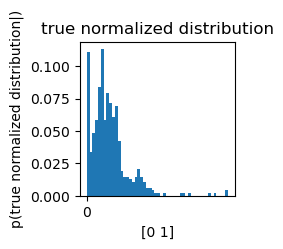

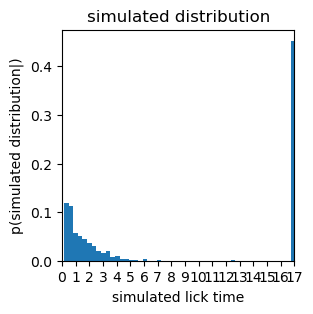

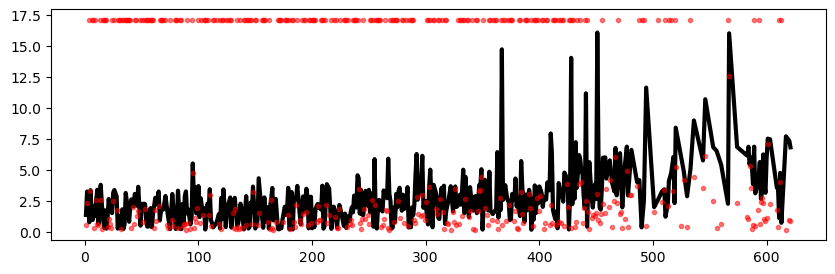

"     WARNING: Number of censored simulated trials=216 out of 477trials"


(Any[0.5, 2.33, 17.1, 3.26, 17.1, 17.1, 0.32999999999999996, 17.1, 2.54, 0.61  …  7.090000000000001, 2.21, 1.7799999999999998, 0.37, 17.1, 4.03, 17.1, 0.16, 0.9, 0.85], ([1, 2, 4, 5, 6, 7, 8, 9, 10, 11  …  601, 603, 609, 610, 611, 612, 613, 617, 620, 621], Any[1.3481129361966697, 3.2381389674781684, 0.7540004898528244, 3.3472173847511333, 1.4867854978443338, 0.9429930949592261, 2.028078395292389, 1.2443334704502564, 2.5515748140286316, 3.380610777390152  …  7.507794155050981, 7.454704659567989, 3.541578927536323, 3.562174852337634, 1.097362550751579, 4.741041596669002, 0.7128886244241874, 7.692157676087962, 7.317031900095146, 6.805033206369345], Array{Any,1}[[0.5], [2.33], [17.1], [3.26], [17.1], [17.1], [0.32999999999999996], [17.1], [2.54], [0.61]  …  [7.090000000000001], [2.21], [1.7799999999999998], [0.37], [17.1], [4.03], [17.1], [0.16], [0.9], [0.85]]), 216)

In [168]:
sim_behavior5(df, pp, edges; showTrials=false, nsims=1, ndp_per_sample = 1, p_scaling=1.0)

[:Y]
actual lick-time=1.3481129361966697 found lick time at=0.43999999999999995
actual lick-time=0.7540004898528244 found lick time at=0.5599999999999999
actual lick-time=3.3472173847511333 found lick time at=0.9400000000000001
actual lick-time=1.4867854978443338 found lick time at=0.62
actual lick-time=3.7821313307982405 found lick time at=1.74
actual lick-time=1.7161401167482566 found lick time at=0.79
actual lick-time=1.06016990984824 found lick time at=0.38
actual lick-time=2.6281596606199153 found lick time at=0.53
actual lick-time=3.1629538439316343 found lick time at=2.8
actual lick-time=2.849415881907788 found lick time at=0.8200000000000001
actual lick-time=1.8010233213905542 found lick time at=1.15
actual lick-time=3.121162113024119 found lick time at=2.26
actual lick-time=2.42400005652148 found lick time at=0.45999999999999996
actual lick-time=0.795422293955656 found lick time at=0.47
actual lick-time=2.605764091903926 found lick time at=1.8099999999999998
actual lick-time=2

actual lick-time=5.228845077764137 found lick time at=1.8299999999999998
actual lick-time=5.747842386713685 found lick time at=5.5200000000000005
actual lick-time=3.943899322684268 found lick time at=3.13
actual lick-time=6.75514307784578 found lick time at=0.93
actual lick-time=2.9281003130661962 found lick time at=0.73
actual lick-time=3.7317413011872653 found lick time at=0.32999999999999996
actual lick-time=4.053077720174715 found lick time at=0.35
actual lick-time=5.144961675296661 found lick time at=1.2799999999999998
actual lick-time=6.859722385332049 found lick time at=4.5600000000000005
actual lick-time=2.917102489143166 found lick time at=0.26
actual lick-time=5.437403811431785 found lick time at=2.76
actual lick-time=6.599273918791195 found lick time at=2.52
actual lick-time=2.47988899809397 found lick time at=0.22999999999999998
actual lick-time=11.628378838357989 found lick time at=1.2899999999999998
actual lick-time=1.9761886624191825 found lick time at=0.16
actual lick-t

actual lick-time=5.747842386713685 found lick time at=1.68
actual lick-time=3.943899322684268 found lick time at=3.59
actual lick-time=3.2476370881389673 found lick time at=0.68
actual lick-time=6.75514307784578 found lick time at=6.48
actual lick-time=2.9281003130661962 found lick time at=2.14
actual lick-time=3.7317413011872653 found lick time at=1.02
actual lick-time=6.332026797461559 found lick time at=0.24
actual lick-time=4.053077720174715 found lick time at=0.22999999999999998
actual lick-time=1.958692124359816 found lick time at=0.78
actual lick-time=5.144961675296661 found lick time at=1.74
actual lick-time=6.859722385332049 found lick time at=2.36
actual lick-time=2.917102489143166 found lick time at=2.39
actual lick-time=5.437403811431785 found lick time at=1.5899999999999999
actual lick-time=6.599273918791195 found lick time at=6.550000000000001
actual lick-time=3.998488521429491 found lick time at=1.7799999999999998
actual lick-time=4.15405773983163 found lick time at=1.63

actual lick-time=3.0713719647180366 found lick time at=0.65
actual lick-time=2.4587931722052487 found lick time at=0.3
actual lick-time=3.0370787501216783 found lick time at=1.48
actual lick-time=1.969689948282846 found lick time at=0.2
actual lick-time=3.54237876927618 found lick time at=0.78
actual lick-time=2.4074033404194526 found lick time at=2.26
actual lick-time=1.3302164772673748 found lick time at=0.31
actual lick-time=2.197144943054609 found lick time at=0.97
actual lick-time=4.57667411912844 found lick time at=1.45
actual lick-time=6.265639933053449 found lick time at=1.05
actual lick-time=2.578169551878868 found lick time at=2.1
actual lick-time=4.231042507292842 found lick time at=1.67
actual lick-time=6.1223682814016085 found lick time at=5.930000000000001
actual lick-time=2.4642920841667633 found lick time at=1.03
actual lick-time=5.0034896675594975 found lick time at=1.74
actual lick-time=3.1272609062905268 found lick time at=1.7
actual lick-time=2.7707314507493805 foun

actual lick-time=3.7085458907314197 found lick time at=1.64
actual lick-time=3.8306217362770556 found lick time at=0.5
actual lick-time=3.4746921620408022 found lick time at=2.1799999999999997
actual lick-time=1.6707490980113862 found lick time at=0.87
actual lick-time=1.79652421160386 found lick time at=0.24
actual lick-time=1.2445334308852207 found lick time at=0.43000000000000005
actual lick-time=0.8393336054737914 found lick time at=0.39
actual lick-time=1.5896651416334082 found lick time at=1.08
actual lick-time=2.669251530005056 found lick time at=1.17
actual lick-time=1.9444949334773587 found lick time at=1.8599999999999999
actual lick-time=4.548079776928561 found lick time at=2.7199999999999998
actual lick-time=4.311326621930963 found lick time at=4.09
actual lick-time=1.3939038758034688 found lick time at=0.43000000000000005
actual lick-time=1.3309163387897496 found lick time at=0.5
actual lick-time=2.1840475345644546 found lick time at=1.7999999999999998
actual lick-time=3.28

actual lick-time=6.033085947190099 found lick time at=0.88
actual lick-time=8.390919416070313 found lick time at=4.2
actual lick-time=5.925907154049294 found lick time at=2.4
actual lick-time=4.915607056392738 found lick time at=0.87
actual lick-time=2.853515070824554 found lick time at=2.0
actual lick-time=5.081574217413013 found lick time at=3.4699999999999998
actual lick-time=8.974104024643367 found lick time at=1.26
actual lick-time=5.7496420306283635 found lick time at=3.6999999999999997
actual lick-time=10.686865130329114 found lick time at=3.55
actual lick-time=6.515990397628611 found lick time at=2.32
actual lick-time=5.39281263443477 found lick time at=0.52
actual lick-time=16.006712522333835 found lick time at=0.22999999999999998
actual lick-time=6.835227232048936 found lick time at=4.17
actual lick-time=6.123668024228875 found lick time at=0.78
actual lick-time=5.994993484329422 found lick time at=0.7100000000000001
actual lick-time=3.832621340626698 found lick time at=1.26


actual lick-time=3.0370787501216783 found lick time at=0.8
actual lick-time=1.969689948282846 found lick time at=1.69
actual lick-time=1.6901452602029121 found lick time at=1.41
actual lick-time=2.9749910350652984 found lick time at=0.62
actual lick-time=2.4074033404194526 found lick time at=0.32
actual lick-time=3.588669609970389 found lick time at=0.57
actual lick-time=2.197144943054609 found lick time at=1.89
actual lick-time=4.57667411912844 found lick time at=0.55
actual lick-time=6.265639933053449 found lick time at=5.970000000000001
actual lick-time=2.578169551878868 found lick time at=1.3399999999999999
actual lick-time=6.1223682814016085 found lick time at=5.82
actual lick-time=2.3414163968812702 found lick time at=1.66
actual lick-time=3.5792714695270726 found lick time at=3.55
actual lick-time=3.775132715574494 found lick time at=0.2
actual lick-time=3.1272609062905268 found lick time at=1.24
actual lick-time=2.434797920009546 found lick time at=0.74
actual lick-time=2.77073

actual lick-time=6.835227232048936 found lick time at=0.77
actual lick-time=6.123668024228875 found lick time at=0.19
actual lick-time=6.853223671195714 found lick time at=5.16
actual lick-time=5.420307194242346 found lick time at=4.04
actual lick-time=5.994993484329422 found lick time at=5.590000000000001
actual lick-time=5.322226600892413 found lick time at=3.58
actual lick-time=3.832621340626698 found lick time at=0.64
actual lick-time=2.6427567723723007 found lick time at=0.35
actual lick-time=6.232546481066876 found lick time at=5.12
actual lick-time=3.8225233386610062 found lick time at=0.24
actual lick-time=3.1330597589044884 found lick time at=0.64
actual lick-time=5.9559012192939225 found lick time at=3.02
actual lick-time=7.507794155050981 found lick time at=6.0
actual lick-time=7.454704659567989 found lick time at=3.32
actual lick-time=3.562174852337634 found lick time at=1.45
actual lick-time=1.097362550751579 found lick time at=1.05
actual lick-time=4.741041596669002 found

actual lick-time=8.974104024643367 found lick time at=1.0999999999999999
actual lick-time=5.7496420306283635 found lick time at=3.89
actual lick-time=10.686865130329114 found lick time at=4.92
actual lick-time=6.814531327030142 found lick time at=4.25
actual lick-time=6.515990397628611 found lick time at=2.87
actual lick-time=5.39281263443477 found lick time at=2.6599999999999997
actual lick-time=2.246035269403353 found lick time at=0.66
actual lick-time=16.006712522333835 found lick time at=4.41
actual lick-time=6.835227232048936 found lick time at=2.42
actual lick-time=6.123668024228875 found lick time at=0.15
actual lick-time=6.853223671195714 found lick time at=6.24
actual lick-time=5.420307194242346 found lick time at=1.06
actual lick-time=5.322226600892413 found lick time at=0.15
actual lick-time=3.832621340626698 found lick time at=0.2
actual lick-time=6.858222682069818 found lick time at=6.32
actual lick-time=3.8174243475694194 found lick time at=2.0100000000000002
actual lick-

actual lick-time=3.0370787501216783 found lick time at=1.16
actual lick-time=3.2456374837893263 found lick time at=3.23
actual lick-time=3.54237876927618 found lick time at=2.63
actual lick-time=1.6901452602029121 found lick time at=0.35
actual lick-time=2.9749910350652984 found lick time at=0.92
actual lick-time=2.4074033404194526 found lick time at=2.21
actual lick-time=3.588669609970389 found lick time at=2.44
actual lick-time=0.3577788879712871 found lick time at=0.18
actual lick-time=1.3302164772673748 found lick time at=0.22
actual lick-time=4.57667411912844 found lick time at=0.55
actual lick-time=6.265639933053449 found lick time at=0.58
actual lick-time=4.231042507292842 found lick time at=1.7799999999999998
actual lick-time=6.1223682814016085 found lick time at=3.81
actual lick-time=1.9263985141130997 found lick time at=0.33999999999999997
actual lick-time=2.3414163968812702 found lick time at=1.25
actual lick-time=1.2881248057074135 found lick time at=0.37
actual lick-time=5

actual lick-time=2.3414163968812702 found lick time at=0.21
actual lick-time=2.4642920841667633 found lick time at=0.35
actual lick-time=3.5792714695270726 found lick time at=3.0
actual lick-time=5.0034896675594975 found lick time at=0.75
actual lick-time=3.775132715574494 found lick time at=0.9600000000000001
actual lick-time=3.1272609062905268 found lick time at=2.2199999999999998
actual lick-time=1.0165785350260472 found lick time at=0.35
actual lick-time=2.7707314507493805 found lick time at=0.38
actual lick-time=3.53617999579229 found lick time at=2.4
actual lick-time=3.7051465633370286 found lick time at=1.5299999999999998
actual lick-time=1.6480535886429508 found lick time at=0.84
actual lick-time=2.1000641518794967 found lick time at=1.7
actual lick-time=3.6629549115595847 found lick time at=3.4
actual lick-time=2.7107433202601245 found lick time at=1.5599999999999998
actual lick-time=3.6471580371974137 found lick time at=0.57
actual lick-time=1.9903858533016396 found lick time

actual lick-time=3.323722033642841 found lick time at=2.76
actual lick-time=3.1387586313009677 found lick time at=1.8099999999999998
actual lick-time=2.6992455952496837 found lick time at=0.39
actual lick-time=3.0713719647180366 found lick time at=1.08
actual lick-time=1.9496939047864275 found lick time at=0.75
actual lick-time=3.0370787501216783 found lick time at=2.6799999999999997
actual lick-time=1.969689948282846 found lick time at=0.74
actual lick-time=3.2456374837893263 found lick time at=2.67
actual lick-time=2.4074033404194526 found lick time at=0.43999999999999995
actual lick-time=4.57667411912844 found lick time at=0.31
actual lick-time=6.265639933053449 found lick time at=3.53
actual lick-time=2.578169551878868 found lick time at=1.2
actual lick-time=6.1223682814016085 found lick time at=2.7199999999999998
actual lick-time=1.9263985141130997 found lick time at=0.33999999999999997
actual lick-time=2.4642920841667633 found lick time at=0.32
actual lick-time=3.5792714695270726

actual lick-time=2.1840475345644546 found lick time at=0.76
actual lick-time=3.2870292938269126 found lick time at=0.18
actual lick-time=2.0960649431802127 found lick time at=0.28
actual lick-time=1.5572715511692097 found lick time at=1.2
actual lick-time=3.105265258444466 found lick time at=1.8299999999999998
actual lick-time=5.851421892025134 found lick time at=4.630000000000001
actual lick-time=1.87100947362802 found lick time at=0.7000000000000001
actual lick-time=2.55867340946986 found lick time at=1.5899999999999999
actual lick-time=2.4429962978430777 found lick time at=2.02
actual lick-time=1.7382357448117993 found lick time at=1.18
actual lick-time=1.6293572879737992 found lick time at=1.06
actual lick-time=3.323722033642841 found lick time at=1.95
actual lick-time=5.888314592276027 found lick time at=5.510000000000001
actual lick-time=3.0713719647180366 found lick time at=0.98
actual lick-time=2.4587931722052487 found lick time at=0.22
actual lick-time=0.3441615823502259 found

actual lick-time=1.927798237157849 found lick time at=1.48
actual lick-time=2.1970449628371274 found lick time at=1.65
actual lick-time=3.8306217362770556 found lick time at=3.07
actual lick-time=2.0177804328917337 found lick time at=0.29000000000000004
actual lick-time=2.149554359533133 found lick time at=1.77
actual lick-time=1.79652421160386 found lick time at=1.22
actual lick-time=1.4570913732521518 found lick time at=1.23
actual lick-time=1.5896651416334082 found lick time at=0.32
actual lick-time=2.669251530005056 found lick time at=0.77
actual lick-time=4.548079776928561 found lick time at=0.9
actual lick-time=4.311326621930963 found lick time at=2.29
actual lick-time=3.3722124391216566 found lick time at=0.8200000000000001
actual lick-time=2.1840475345644546 found lick time at=1.72
actual lick-time=3.2870292938269126 found lick time at=2.7399999999999998
actual lick-time=2.0960649431802127 found lick time at=1.3699999999999999
actual lick-time=1.6797473175847746 found lick time

actual lick-time=1.4180990884341353 found lick time at=0.98
actual lick-time=2.7183418167887634 found lick time at=2.26
actual lick-time=2.758433883999083 found lick time at=1.89
actual lick-time=1.7750284648452097 found lick time at=0.16
actual lick-time=2.7307393637565434 found lick time at=0.64
actual lick-time=0.6457019182762205 found lick time at=0.28
actual lick-time=1.3807064870958323 found lick time at=1.0899999999999999
actual lick-time=1.8449146368651934 found lick time at=0.9
actual lick-time=3.6305613210953864 found lick time at=0.21
actual lick-time=4.307527373666644 found lick time at=2.67
actual lick-time=2.760733429001171 found lick time at=2.62
actual lick-time=0.8148684462559231 found lick time at=0.31
actual lick-time=2.022779443765838 found lick time at=0.88
actual lick-time=2.6030646260319097 found lick time at=2.1
actual lick-time=3.523982409259475 found lick time at=0.28
actual lick-time=0.36377770102021273 found lick time at=0.28
actual lick-time=2.0102819165805

actual lick-time=1.7724289791906755 found lick time at=0.57
actual lick-time=1.4519923821605651 found lick time at=0.41000000000000003
actual lick-time=0.9220672354402238 found lick time at=0.55
actual lick-time=3.3084250603680805 found lick time at=0.19
actual lick-time=2.233537742218091 found lick time at=0.59
actual lick-time=2.8772103823678106 found lick time at=1.24
actual lick-time=3.2457374640068077 found lick time at=0.77
actual lick-time=1.8072220948744442 found lick time at=0.18
actual lick-time=1.1256569522990114 found lick time at=0.49
actual lick-time=2.666352103698075 found lick time at=1.26
actual lick-time=3.6079657919444337 found lick time at=1.69
actual lick-time=1.4768874563136065 found lick time at=0.8300000000000001
actual lick-time=3.678151904616863 found lick time at=2.6999999999999997
actual lick-time=1.1738474171253805 found lick time at=1.14
actual lick-time=1.3887049044943998 found lick time at=1.08
actual lick-time=1.8206194440170447 found lick time at=1.609

actual lick-time=3.562174852337634 found lick time at=0.9500000000000001
actual lick-time=1.097362550751579 found lick time at=0.5
actual lick-time=4.741041596669002 found lick time at=2.4699999999999998
actual lick-time=7.317031900095146 found lick time at=0.22999999999999998
actual lick-time=6.805033206369345 found lick time at=4.430000000000001
actual lick-time=1.3481129361966697 found lick time at=0.8300000000000001
actual lick-time=3.2381389674781684 found lick time at=0.45999999999999996
actual lick-time=1.2443334704502564 found lick time at=0.47
actual lick-time=3.380610777390152 found lick time at=1.48
actual lick-time=0.6166076749889312 found lick time at=0.47
actual lick-time=3.7821313307982405 found lick time at=3.51
actual lick-time=2.2081427669776397 found lick time at=0.24
actual lick-time=1.089064192700565 found lick time at=0.33999999999999997
actual lick-time=1.06016990984824 found lick time at=0.97
actual lick-time=2.6281596606199153 found lick time at=0.37
actual lic

actual lick-time=2.434797920009546 found lick time at=1.73
actual lick-time=2.7707314507493805 found lick time at=2.67
actual lick-time=3.53617999579229 found lick time at=2.82
actual lick-time=3.7051465633370286 found lick time at=0.57
actual lick-time=1.6480535886429508 found lick time at=1.24
actual lick-time=2.1000641518794967 found lick time at=1.17
actual lick-time=3.6629549115595847 found lick time at=1.03
actual lick-time=2.7107433202601245 found lick time at=1.7
actual lick-time=3.6471580371974137 found lick time at=1.13
actual lick-time=1.9903858533016396 found lick time at=0.73
actual lick-time=2.070170066852351 found lick time at=1.8399999999999999
actual lick-time=2.4389970891437938 found lick time at=0.32
actual lick-time=4.9994904588602145 found lick time at=2.1599999999999997
actual lick-time=4.424004327033283 found lick time at=1.63
actual lick-time=2.617261816914367 found lick time at=0.3
actual lick-time=3.5887695901878716 found lick time at=2.64
actual lick-time=1.8

actual lick-time=1.9584921639248516 found lick time at=1.72
actual lick-time=2.197144943054609 found lick time at=1.22
actual lick-time=4.57667411912844 found lick time at=2.5
actual lick-time=6.265639933053449 found lick time at=0.57
actual lick-time=6.1223682814016085 found lick time at=3.9
actual lick-time=2.3414163968812702 found lick time at=0.43000000000000005
actual lick-time=2.4642920841667633 found lick time at=1.16
actual lick-time=3.1272609062905268 found lick time at=2.4099999999999997
actual lick-time=2.7707314507493805 found lick time at=1.42
actual lick-time=3.7051465633370286 found lick time at=0.18
actual lick-time=2.1000641518794967 found lick time at=1.3199999999999998
actual lick-time=3.6629549115595847 found lick time at=2.38
actual lick-time=1.6345562592828682 found lick time at=0.26
actual lick-time=2.7107433202601245 found lick time at=1.77
actual lick-time=3.6471580371974137 found lick time at=3.4699999999999998
actual lick-time=1.9903858533016396 found lick ti

actual lick-time=1.9496939047864275 found lick time at=1.72
actual lick-time=3.0370787501216783 found lick time at=0.21
actual lick-time=1.969689948282846 found lick time at=0.62
actual lick-time=3.54237876927618 found lick time at=0.48
actual lick-time=1.6901452602029121 found lick time at=0.99
actual lick-time=2.4074033404194526 found lick time at=1.5899999999999999
actual lick-time=3.588669609970389 found lick time at=0.43000000000000005
actual lick-time=1.9584921639248516 found lick time at=0.62
actual lick-time=2.197144943054609 found lick time at=1.51
actual lick-time=4.57667411912844 found lick time at=0.73
actual lick-time=6.265639933053449 found lick time at=3.62
actual lick-time=6.1223682814016085 found lick time at=2.46
actual lick-time=1.9263985141130997 found lick time at=1.27
actual lick-time=5.0034896675594975 found lick time at=3.1799999999999997
actual lick-time=0.35184006305285076 found lick time at=0.15
actual lick-time=1.0165785350260472 found lick time at=0.2
actua

actual lick-time=1.5730684255313805 found lick time at=1.3499999999999999
actual lick-time=3.4629944765953975 found lick time at=0.22999999999999998
actual lick-time=2.7985259512094025 found lick time at=0.18
actual lick-time=1.5548720259496396 found lick time at=1.47
actual lick-time=2.818222054053375 found lick time at=1.04
actual lick-time=2.053673330967805 found lick time at=0.28
actual lick-time=1.7697295133186588 found lick time at=1.3199999999999998
actual lick-time=3.7085458907314197 found lick time at=1.75
actual lick-time=2.1970449628371274 found lick time at=2.07
actual lick-time=3.8306217362770556 found lick time at=2.0
actual lick-time=1.6707490980113862 found lick time at=0.33999999999999997
actual lick-time=1.4945839548079372 found lick time at=0.49
actual lick-time=1.5896651416334082 found lick time at=1.48
actual lick-time=1.9757887415492539 found lick time at=1.0899999999999999
actual lick-time=2.9092040519620803 found lick time at=2.9
actual lick-time=2.6692515300050

actual lick-time=1.5259777430973143 found lick time at=1.0999999999999999
actual lick-time=1.3807064870958323 found lick time at=1.2999999999999998
actual lick-time=2.2552334494117057 found lick time at=0.73
actual lick-time=2.867312340837083 found lick time at=1.71
actual lick-time=2.3599127371154576 found lick time at=0.31
actual lick-time=1.573368366183827 found lick time at=1.43
actual lick-time=3.6305613210953864 found lick time at=0.43000000000000005
actual lick-time=4.307527373666644 found lick time at=0.27
actual lick-time=1.1845453003959645 found lick time at=0.42000000000000004
actual lick-time=0.8148684462559231 found lick time at=0.22
actual lick-time=1.9780882865513423 found lick time at=1.63
actual lick-time=0.23970225112493443 found lick time at=0.21
actual lick-time=2.022779443765838 found lick time at=0.36
actual lick-time=2.6030646260319097 found lick time at=1.65
actual lick-time=3.523982409259475 found lick time at=1.44
actual lick-time=0.9010014036167467 found lick

actual lick-time=1.3723081488273365 found lick time at=0.45999999999999996
actual lick-time=3.036978769904196 found lick time at=1.95
actual lick-time=1.7724289791906755 found lick time at=0.7000000000000001
actual lick-time=1.4519923821605651 found lick time at=0.33999999999999997
actual lick-time=3.3084250603680805 found lick time at=2.4299999999999997
actual lick-time=0.22258563789200003 found lick time at=0.21
actual lick-time=2.233537742218091 found lick time at=1.52
actual lick-time=0.6657979419901213 found lick time at=0.29000000000000004
actual lick-time=2.8772103823678106 found lick time at=0.9400000000000001
actual lick-time=1.8072220948744442 found lick time at=0.74
actual lick-time=1.1256569522990114 found lick time at=0.67
actual lick-time=5.5038906560573775 found lick time at=4.62
actual lick-time=3.6079657919444337 found lick time at=3.23
actual lick-time=1.4768874563136065 found lick time at=0.29000000000000004
actual lick-time=1.9546929156605322 found lick time at=1.34

actual lick-time=2.668851609135127 found lick time at=2.05
actual lick-time=3.6169640115178217 found lick time at=0.63
actual lick-time=0.4785050005809153 found lick time at=0.44999999999999996
actual lick-time=2.2392366146145704 found lick time at=1.51
actual lick-time=1.9263985141130997 found lick time at=0.87
actual lick-time=2.2160412041587247 found lick time at=0.3
actual lick-time=0.4057493963191957 found lick time at=0.16
actual lick-time=1.4173992269117606 found lick time at=0.61
actual lick-time=2.05437319249018 found lick time at=0.31
actual lick-time=2.7329389285411496 found lick time at=2.6999999999999997
actual lick-time=2.19624512109727 found lick time at=1.51
actual lick-time=3.236239343346009 found lick time at=1.65
actual lick-time=0.9023311405092587 found lick time at=0.63
actual lick-time=2.1263589490772876 found lick time at=0.31
actual lick-time=3.036978769904196 found lick time at=1.93
actual lick-time=1.4519923821605651 found lick time at=0.6900000000000001
actua

actual lick-time=5.039282585418087 found lick time at=0.33999999999999997
actual lick-time=1.72393857371186 found lick time at=1.19
actual lick-time=1.415599582997083 found lick time at=0.3
actual lick-time=6.418109764713642 found lick time at=1.5899999999999999
actual lick-time=3.3328202334337114 found lick time at=1.6099999999999999
actual lick-time=1.743234755685904 found lick time at=0.9400000000000001
actual lick-time=14.713968310290364 found lick time at=5.590000000000001
actual lick-time=3.0892684236473316 found lick time at=0.87
actual lick-time=2.5546742007705765 found lick time at=1.2899999999999998
actual lick-time=3.030979956855271 found lick time at=0.92
actual lick-time=2.5484754272866863 found lick time at=1.72
actual lick-time=4.288131211475117 found lick time at=1.18
actual lick-time=2.0351769907336177 found lick time at=1.5299999999999998
actual lick-time=2.641856950414962 found lick time at=2.11
actual lick-time=1.2605302656823558 found lick time at=0.950000000000000

actual lick-time=2.8340189284155457 found lick time at=2.4699999999999998
actual lick-time=1.4907847065436175 found lick time at=0.38
actual lick-time=1.6890454778106092 found lick time at=0.77
actual lick-time=3.757936118167574 found lick time at=1.96
actual lick-time=3.533880450790202 found lick time at=0.39
actual lick-time=5.039282585418087 found lick time at=0.48
actual lick-time=4.191150400517486 found lick time at=0.91
actual lick-time=1.8648107001441299 found lick time at=0.43999999999999995
actual lick-time=1.7066419960874577 found lick time at=0.62
actual lick-time=4.8349230208846885 found lick time at=2.6799999999999997
actual lick-time=6.418109764713642 found lick time at=4.32
actual lick-time=3.3328202334337114 found lick time at=0.32
actual lick-time=14.713968310290364 found lick time at=8.620000000000001
actual lick-time=3.7480380766368464 found lick time at=2.19
actual lick-time=3.0892684236473316 found lick time at=1.08
actual lick-time=0.990303733871753 found lick tim

actual lick-time=3.2456374837893263 found lick time at=3.08
actual lick-time=3.54237876927618 found lick time at=3.38
actual lick-time=1.6901452602029121 found lick time at=1.21
actual lick-time=1.8297176438079152 found lick time at=1.1099999999999999
actual lick-time=3.588669609970389 found lick time at=1.16
actual lick-time=0.33884263478017856 found lick time at=0.32999999999999996
actual lick-time=1.9584921639248516 found lick time at=0.48
actual lick-time=2.197144943054609 found lick time at=1.3399999999999999
actual lick-time=4.57667411912844 found lick time at=0.25
actual lick-time=6.265639933053449 found lick time at=4.44
actual lick-time=2.578169551878868 found lick time at=2.2399999999999998
actual lick-time=4.231042507292842 found lick time at=3.4499999999999997
actual lick-time=6.1223682814016085 found lick time at=3.5
actual lick-time=1.9263985141130997 found lick time at=0.62
actual lick-time=2.3414163968812702 found lick time at=0.3
actual lick-time=1.2881248057074135 fou

actual lick-time=3.323722033642841 found lick time at=2.85
actual lick-time=2.8069242894778985 found lick time at=1.24
actual lick-time=3.1387586313009677 found lick time at=1.67
actual lick-time=2.6992455952496837 found lick time at=2.4
actual lick-time=5.888314592276027 found lick time at=0.74
actual lick-time=3.0713719647180366 found lick time at=0.19
actual lick-time=1.9496939047864275 found lick time at=0.9
actual lick-time=3.0370787501216783 found lick time at=2.1
actual lick-time=1.969689948282846 found lick time at=1.46
actual lick-time=3.2456374837893263 found lick time at=0.36
actual lick-time=3.54237876927618 found lick time at=2.59
actual lick-time=2.9749910350652984 found lick time at=2.15
actual lick-time=2.4074033404194526 found lick time at=1.66
actual lick-time=3.588669609970389 found lick time at=0.42000000000000004
actual lick-time=1.3302164772673748 found lick time at=0.59
actual lick-time=2.197144943054609 found lick time at=0.9500000000000001
actual lick-time=4.57

actual lick-time=8.974104024643367 found lick time at=1.97
actual lick-time=5.7496420306283635 found lick time at=4.67
actual lick-time=10.686865130329114 found lick time at=4.300000000000001
actual lick-time=6.814531327030142 found lick time at=3.09
actual lick-time=6.515990397628611 found lick time at=5.69
actual lick-time=5.39281263443477 found lick time at=0.7100000000000001
actual lick-time=2.246035269403353 found lick time at=0.97
actual lick-time=16.006712522333835 found lick time at=1.8699999999999999
actual lick-time=6.835227232048936 found lick time at=4.86
actual lick-time=6.123668024228875 found lick time at=1.7999999999999998
actual lick-time=6.853223671195714 found lick time at=0.9600000000000001
actual lick-time=5.420307194242346 found lick time at=3.94
actual lick-time=5.994993484329422 found lick time at=0.52
actual lick-time=5.322226600892413 found lick time at=1.04
actual lick-time=3.832621340626698 found lick time at=0.35
actual lick-time=6.858222682069818 found lic

actual lick-time=3.829321993449789 found lick time at=3.7199999999999998
actual lick-time=2.63315867149402 found lick time at=0.7000000000000001
actual lick-time=16.07 found lick time at=7.630000000000001
actual lick-time=6.352822682697834 found lick time at=1.39
actual lick-time=1.9623913924066536 found lick time at=1.89
actual lick-time=1.770029453971105 found lick time at=1.17
actual lick-time=3.49988717684629 found lick time at=0.26
actual lick-time=5.966899043216952 found lick time at=3.42
actual lick-time=5.99209405802244 found lick time at=5.86
actual lick-time=5.228845077764137 found lick time at=0.59
actual lick-time=5.747842386713685 found lick time at=1.23
actual lick-time=6.75514307784578 found lick time at=2.64
actual lick-time=2.9281003130661962 found lick time at=2.88
actual lick-time=3.7317413011872653 found lick time at=0.64
actual lick-time=6.332026797461559 found lick time at=2.87
actual lick-time=4.053077720174715 found lick time at=1.08
actual lick-time=1.958692124

actual lick-time=2.2178408480734024 found lick time at=0.15
actual lick-time=4.14216009395126 found lick time at=2.35
actual lick-time=2.6553542797750445 found lick time at=1.91
actual lick-time=7.222250653922122 found lick time at=5.91
actual lick-time=3.52948132122099 found lick time at=2.32
actual lick-time=6.173558152752441 found lick time at=1.52
actual lick-time=5.803731328286176 found lick time at=0.29000000000000004
actual lick-time=4.8805140000565235 found lick time at=4.62
actual lick-time=4.643660864841443 found lick time at=2.33
actual lick-time=2.8509155851700196 found lick time at=1.89
actual lick-time=11.161771163369059 found lick time at=0.39
actual lick-time=3.905406938953662 found lick time at=2.27
actual lick-time=5.605870477889112 found lick time at=4.13
actual lick-time=2.8016253379513474 found lick time at=1.75
actual lick-time=1.9453947554346973 found lick time at=1.51
actual lick-time=3.829321993449789 found lick time at=2.4
actual lick-time=2.63315867149402 fou

actual lick-time=2.7364382361530226 found lick time at=1.16
actual lick-time=0.9593698545827932 found lick time at=0.89
actual lick-time=3.5535765536341746 found lick time at=2.51
actual lick-time=3.405705811978158 found lick time at=0.64
actual lick-time=1.9989841520050997 found lick time at=0.47
actual lick-time=2.59256670319629 found lick time at=0.85
actual lick-time=3.3334201147386042 found lick time at=1.2899999999999998
actual lick-time=7.924711661951312 found lick time at=3.9699999999999998
actual lick-time=6.406712019920683 found lick time at=0.59
actual lick-time=1.6328565955856724 found lick time at=1.47
actual lick-time=3.9164047628766925 found lick time at=1.49
actual lick-time=3.4010067417564995 found lick time at=1.3499999999999999
actual lick-time=2.9003058126061743 found lick time at=1.3299999999999998
actual lick-time=3.587369867143122 found lick time at=1.67
actual lick-time=2.8625132903979424 found lick time at=1.7899999999999998
actual lick-time=14.024904651403775 

actual lick-time=2.8340189284155457 found lick time at=0.66
actual lick-time=2.8740110154083833 found lick time at=2.25
actual lick-time=3.757936118167574 found lick time at=2.4099999999999997
actual lick-time=3.533880450790202 found lick time at=0.6900000000000001
actual lick-time=5.039282585418087 found lick time at=1.18
actual lick-time=4.191150400517486 found lick time at=0.93
actual lick-time=1.8648107001441299 found lick time at=1.2899999999999998
actual lick-time=4.8349230208846885 found lick time at=2.28
actual lick-time=1.72393857371186 found lick time at=0.47
actual lick-time=1.5563717292118708 found lick time at=0.67
actual lick-time=1.415599582997083 found lick time at=1.3399999999999999
actual lick-time=6.418109764713642 found lick time at=3.2199999999999998
actual lick-time=3.3328202334337114 found lick time at=0.3
actual lick-time=1.743234755685904 found lick time at=1.2799999999999998
actual lick-time=14.713968310290364 found lick time at=4.260000000000001
actual lick-t

actual lick-time=3.6629549115595847 found lick time at=1.3399999999999999
actual lick-time=2.7107433202601245 found lick time at=1.2799999999999998
actual lick-time=3.6471580371974137 found lick time at=0.6
actual lick-time=2.4389970891437938 found lick time at=1.92
actual lick-time=2.9818896700715625 found lick time at=0.92
actual lick-time=4.424004327033283 found lick time at=4.29
actual lick-time=2.8433170886413808 found lick time at=1.3399999999999999
actual lick-time=1.1835454982211435 found lick time at=0.5
actual lick-time=3.5887695901878716 found lick time at=0.55
actual lick-time=1.8591118277476506 found lick time at=0.24
actual lick-time=2.8340189284155457 found lick time at=1.7
actual lick-time=1.4907847065436175 found lick time at=1.3599999999999999
actual lick-time=3.757936118167574 found lick time at=2.73
actual lick-time=5.039282585418087 found lick time at=4.3500000000000005
actual lick-time=4.191150400517486 found lick time at=0.24
actual lick-time=4.8349230208846885 f

actual lick-time=2.4074033404194526 found lick time at=2.1599999999999997
actual lick-time=3.588669609970389 found lick time at=3.52
actual lick-time=0.33884263478017856 found lick time at=0.26
actual lick-time=2.197144943054609 found lick time at=1.48
actual lick-time=4.57667411912844 found lick time at=3.05
actual lick-time=6.1223682814016085 found lick time at=3.35
actual lick-time=1.9263985141130997 found lick time at=1.5599999999999998
actual lick-time=2.3414163968812702 found lick time at=0.16999999999999998
actual lick-time=2.4642920841667633 found lick time at=1.8599999999999999
actual lick-time=0.35184006305285076 found lick time at=0.18
actual lick-time=3.775132715574494 found lick time at=0.57
actual lick-time=2.434797920009546 found lick time at=2.15
actual lick-time=3.7051465633370286 found lick time at=2.04
actual lick-time=2.1000641518794967 found lick time at=0.21
actual lick-time=3.6629549115595847 found lick time at=0.59
actual lick-time=2.7107433202601245 found lick 

actual lick-time=1.0165785350260472 found lick time at=0.84
actual lick-time=3.53617999579229 found lick time at=1.95
actual lick-time=1.6480535886429508 found lick time at=1.0899999999999999
actual lick-time=2.1000641518794967 found lick time at=0.26
actual lick-time=2.493686268106499 found lick time at=1.3199999999999998
actual lick-time=3.6629549115595847 found lick time at=2.52
actual lick-time=2.7107433202601245 found lick time at=1.89
actual lick-time=3.6471580371974137 found lick time at=0.2
actual lick-time=1.9903858533016396 found lick time at=0.32
actual lick-time=2.070170066852351 found lick time at=0.16
actual lick-time=2.4389970891437938 found lick time at=0.22999999999999998
actual lick-time=2.9818896700715625 found lick time at=1.5299999999999998
actual lick-time=3.325421697340037 found lick time at=1.42
actual lick-time=4.9994904588602145 found lick time at=2.59
actual lick-time=2.617261816914367 found lick time at=2.51
actual lick-time=2.8433170886413808 found lick tim

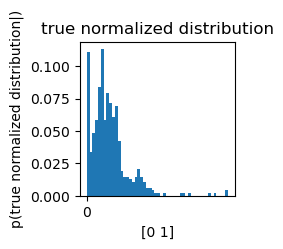

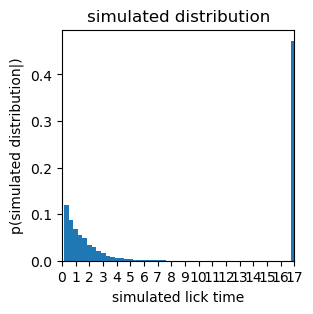

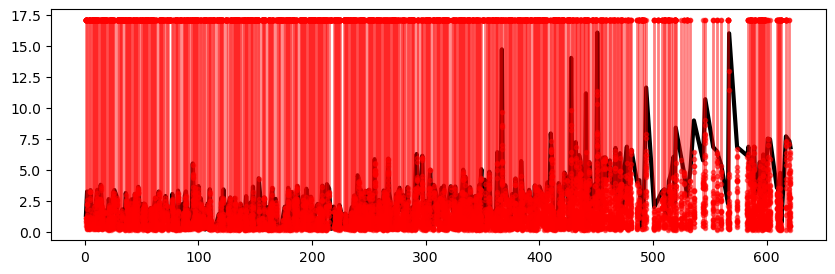

(Any[0.43999999999999995, 17.1, 0.5599999999999999, 0.9400000000000001, 0.62, 17.1, 17.1, 17.1, 17.1, 17.1  …  0.36, 1.05, 2.54, 1.15, 17.1, 2.36, 17.1, 17.1, 0.48, 6.25], ([1, 2, 4, 5, 6, 7, 8, 9, 10, 11  …  601, 603, 609, 610, 611, 612, 613, 617, 620, 621], Any[1.3481129361966697, 3.2381389674781684, 0.7540004898528244, 3.3472173847511333, 1.4867854978443338, 0.9429930949592261, 2.028078395292389, 1.2443334704502564, 2.5515748140286316, 3.380610777390152  …  7.507794155050981, 7.454704659567989, 3.541578927536323, 3.562174852337634, 1.097362550751579, 4.741041596669002, 0.7128886244241874, 7.692157676087962, 7.317031900095146, 6.805033206369345], Array{Any,1}[[0.43999999999999995, 0.68, 0.8300000000000001, 0.87, 1.07, 1.1199999999999999, 1.14, 17.1, 17.1, 17.1  …  17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1], [0.21, 0.24, 0.31, 0.38, 0.45999999999999996, 0.47, 0.52, 0.66, 0.72, 0.88  …  2.59, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1], [0.18, 0.19, 0.26, 0.3

In [169]:
(movement_positions, sim_data,censor_count) = sim_behavior5(df, pp, edges; showTrials=false, nsims=30, ndp_per_sample = 1, p_scaling=1.0)

In [152]:
function plot_sim_fit2(sim_data::Tuple; xl=[1,20])
    (trialIDs, true_move_times_by_trial, movement_positions_by_trial) = sim_data
    figure(figsize=(10,3))
    ax1=subplot(1,2,1)
    ax2=subplot(1,2,2)
    figure(figsize=(10,3))
    ax3=subplot(1,2,1)
    ax4=subplot(1,2,2)
    figure(figsize=(10,3))
    ax5=subplot(1,2,1)
    ax6=subplot(1,2,2)
    
    
    
    figure(figsize=(10,3))
    ax=subplot(1,1,1)
    ax.plot(trialIDs, true_move_times_by_trial, "k-",linewidth=3)
    [sort!(x) for x in movement_positions_by_trial]
    true_moves=[]
    meds_x = []
    meds_y = []
    lows_y = []
    highs_y = []
    for i=1:length(trialIDs)
        xxs = trialIDs[i].*ones(length(movement_positions_by_trial[i]))
#         pretty_print_list(movement_positions_by_trial[i], orient="horizontal")
#         plot(xxs, true_move_times_by_trial[i], "r.-", alpha=0.5, linewidth=2) 
        ax.plot(xxs, movement_positions_by_trial[i], "r.-", alpha=0.5, linewidth=1) 
        if length(xxs)>0
#             println(median(movement_positions_by_trial[i]))
            ax.plot(xxs[1], median(movement_positions_by_trial[i]), "c.-", alpha=1., markersize=10) 
            push!(meds_x, xxs[1])
            push!(meds_y, median(movement_positions_by_trial[i]))
            push!(true_moves, true_move_times_by_trial[i])
            push!(lows_y, minimum(movement_positions_by_trial[i]))
            push!(highs_y, maximum(movement_positions_by_trial[i]))
        end
    end    
    
    render_distribution(true_moves, "lick time (s)", t="true distribution", bins=0:0.5:17, ax=ax1)
    ax1.set_xticks(0:17)
    ax1.set_xlim([0,17])
    render_distribution(lows_y, "lick time (s)", t="min simulated distribution", bins=0:0.5:17, ax=ax2)
    ax2.set_xticks(0:17)
    ax2.set_xlim([0,17])
    set_yaxes_same_scale([ax1, ax2])
    
    
    render_distribution(true_moves, "lick time (s)", t="true distribution", bins=0:0.5:17, ax=ax3)
    ax3.set_xticks(0:17)
    ax3.set_xlim([0,17])
    
    render_distribution(meds_y, "lick time (s)", t="median simulated distribution", bins=0:0.5:17, ax=ax4)
    ax4.set_xticks(0:17)
    ax4.set_xlim([0,17])
    set_yaxes_same_scale([ax3, ax4])
    
    render_distribution(true_moves, "lick time (s)", t="true distribution", bins=0:0.5:17, ax=ax5)
    ax5.set_xticks(0:17)
    ax5.set_xlim([0,17])
    
    
    render_distribution(highs_y, "lick time (s)", t="max simulated distribution", bins=0:0.5:17, ax=ax6)
    ax6.set_xticks(0:17)
    ax6.set_xlim([0,17])
    set_yaxes_same_scale([ax5, ax6])
    
    
    ax.plot(meds_x, meds_y, "c-", linewidth=2)
   
    xticks(0:trialIDs[end], rotation="vertical")
     ax.set_xlim(xl)
    ax.set_xlabel("Trial #")
    ax.set_ylabel("Lick Time (s)")
    println(size(true_moves))
    println(size(meds_y))
    rsq = Rsq(true_moves, meds_y)
    ax.set_title(join(["Median Simulation Rsq = ", rsq]))
    
    
end

plot_sim_fit2 (generic function with 1 method)

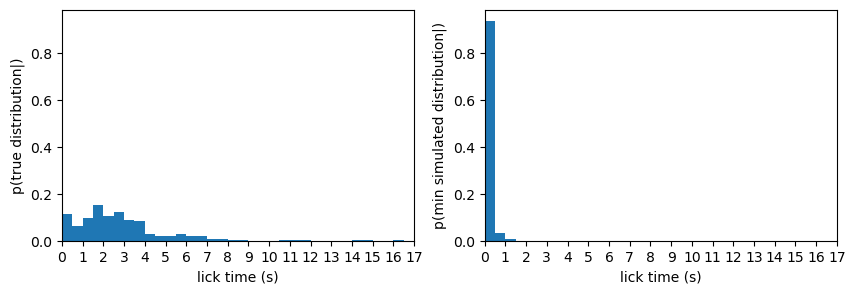

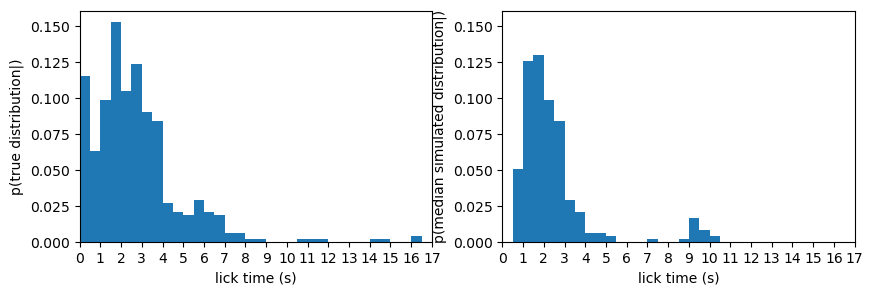

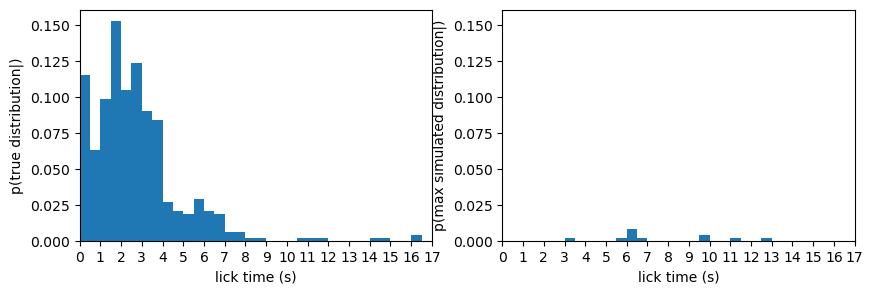

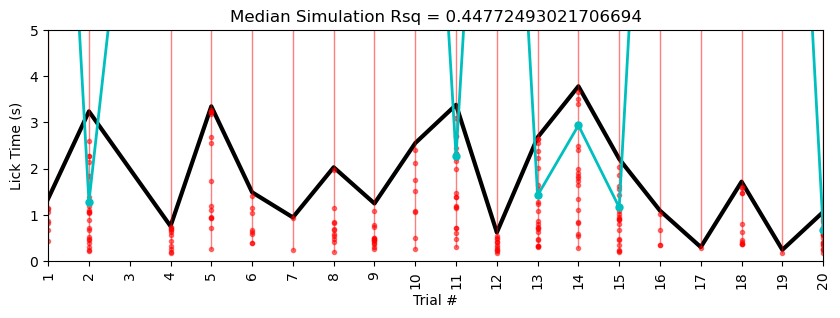

(477,)
(477,)


(0.0, 5.0)

In [170]:
plot_sim_fit2(sim_data, xl=[1,20])
ylim([0,5])

[:Y]
actual lick-time=3.2381389674781684 found lick time at=2.07
actual lick-time=3.3472173847511333 found lick time at=0.66
actual lick-time=1.4867854978443338 found lick time at=0.58
actual lick-time=0.9429930949592261 found lick time at=0.28
actual lick-time=1.2443334704502564 found lick time at=0.27
actual lick-time=2.5515748140286316 found lick time at=0.44999999999999996
actual lick-time=3.380610777390152 found lick time at=2.06
actual lick-time=0.6166076749889312 found lick time at=0.25
actual lick-time=2.675150362836499 found lick time at=0.43999999999999995
actual lick-time=1.089064192700565 found lick time at=0.66
actual lick-time=2.6281596606199153 found lick time at=0.7000000000000001
actual lick-time=1.498883104159667 found lick time at=0.15
actual lick-time=3.1629538439316343 found lick time at=0.4
actual lick-time=1.8010233213905542 found lick time at=0.44999999999999996
actual lick-time=0.5919325573143506 found lick time at=0.42000000000000004
actual lick-time=2.4240000

actual lick-time=3.5535765536341746 found lick time at=1.89
actual lick-time=2.7826290966297496 found lick time at=2.67
actual lick-time=2.59256670319629 found lick time at=2.53
actual lick-time=3.968894377054791 found lick time at=2.25
actual lick-time=3.3334201147386042 found lick time at=0.35
actual lick-time=7.924711661951312 found lick time at=3.6999999999999997
actual lick-time=6.406712019920683 found lick time at=2.1
actual lick-time=3.9164047628766925 found lick time at=1.65
actual lick-time=3.4010067417564995 found lick time at=1.5
actual lick-time=2.422900274129177 found lick time at=0.7000000000000001
actual lick-time=4.768336196041614 found lick time at=1.22
actual lick-time=4.3741141985097185 found lick time at=4.220000000000001
actual lick-time=2.8625132903979424 found lick time at=2.6999999999999997
actual lick-time=14.024904651403775 found lick time at=3.96
actual lick-time=2.2178408480734024 found lick time at=1.7799999999999998
actual lick-time=2.6553542797750445 foun

actual lick-time=2.8433170886413808 found lick time at=0.43000000000000005
actual lick-time=3.5887695901878716 found lick time at=1.02
actual lick-time=1.8591118277476506 found lick time at=0.9600000000000001
actual lick-time=1.6954442117294632 found lick time at=1.5499999999999998
actual lick-time=1.6890454778106092 found lick time at=1.5299999999999998
actual lick-time=3.757936118167574 found lick time at=1.67
actual lick-time=3.533880450790202 found lick time at=1.99
actual lick-time=5.039282585418087 found lick time at=0.72
actual lick-time=1.8648107001441299 found lick time at=0.25
actual lick-time=1.415599582997083 found lick time at=0.55
actual lick-time=1.8283179207631657 found lick time at=0.74
actual lick-time=6.418109764713642 found lick time at=4.19
actual lick-time=3.3328202334337114 found lick time at=1.39
actual lick-time=1.743234755685904 found lick time at=1.1099999999999999
actual lick-time=14.713968310290364 found lick time at=0.66
actual lick-time=3.7480380766368464

actual lick-time=1.9263985141130997 found lick time at=1.48
actual lick-time=2.262332044852934 found lick time at=1.7
actual lick-time=2.2160412041587247 found lick time at=1.21
actual lick-time=0.8361342385143643 found lick time at=0.39
actual lick-time=1.7917251611647194 found lick time at=0.74
actual lick-time=1.4173992269117606 found lick time at=0.63
actual lick-time=2.05437319249018 found lick time at=0.3
actual lick-time=2.7329389285411496 found lick time at=0.25
actual lick-time=3.236239343346009 found lick time at=1.67
actual lick-time=1.6502531534275569 found lick time at=0.2
actual lick-time=1.8719092955853587 found lick time at=0.66
actual lick-time=2.876510520845436 found lick time at=2.73
actual lick-time=1.3723081488273365 found lick time at=0.25
actual lick-time=3.036978769904196 found lick time at=0.9
actual lick-time=1.7724289791906755 found lick time at=1.2
actual lick-time=1.4519923821605651 found lick time at=0.63
actual lick-time=3.3084250603680805 found lick time

actual lick-time=1.6502531534275569 found lick time at=1.02
actual lick-time=2.1263589490772876 found lick time at=0.57
actual lick-time=1.3723081488273365 found lick time at=0.99
actual lick-time=3.036978769904196 found lick time at=1.49
actual lick-time=1.4519923821605651 found lick time at=0.4
actual lick-time=3.3084250603680805 found lick time at=1.39
actual lick-time=2.8772103823678106 found lick time at=0.22
actual lick-time=5.5038906560573775 found lick time at=3.19
actual lick-time=3.6079657919444337 found lick time at=3.29
actual lick-time=1.4768874563136065 found lick time at=0.8300000000000001
actual lick-time=3.678151904616863 found lick time at=2.17
actual lick-time=1.3887049044943998 found lick time at=0.55
actual lick-time=1.8981041125656672 found lick time at=0.63
actual lick-time=2.2644316294200584 found lick time at=1.91
actual lick-time=1.8206194440170447 found lick time at=0.28
actual lick-time=3.4241021719948628 found lick time at=1.19
actual lick-time=0.9562904638

actual lick-time=3.52948132122099 found lick time at=0.74
actual lick-time=6.173558152752441 found lick time at=3.6999999999999997
actual lick-time=4.643660864841443 found lick time at=1.4
actual lick-time=11.161771163369059 found lick time at=2.03
actual lick-time=3.905406938953662 found lick time at=1.25
actual lick-time=5.605870477889112 found lick time at=0.44999999999999996
actual lick-time=1.9453947554346973 found lick time at=0.32
actual lick-time=3.829321993449789 found lick time at=2.61
actual lick-time=16.07 found lick time at=0.85
actual lick-time=6.352822682697834 found lick time at=3.07
actual lick-time=1.770029453971105 found lick time at=1.3099999999999998
actual lick-time=3.49988717684629 found lick time at=1.91
actual lick-time=5.99209405802244 found lick time at=0.62
actual lick-time=5.228845077764137 found lick time at=3.13
actual lick-time=3.943899322684268 found lick time at=0.78
actual lick-time=3.2476370881389673 found lick time at=1.94
actual lick-time=2.9281003

actual lick-time=2.053673330967805 found lick time at=0.36
actual lick-time=1.7697295133186588 found lick time at=1.2799999999999998
actual lick-time=3.7085458907314197 found lick time at=0.37
actual lick-time=0.46090848230406667 found lick time at=0.4
actual lick-time=2.1970449628371274 found lick time at=0.25
actual lick-time=3.4746921620408022 found lick time at=3.07
actual lick-time=2.0177804328917337 found lick time at=1.73
actual lick-time=1.6707490980113862 found lick time at=0.21
actual lick-time=1.2910242320143943 found lick time at=0.37
actual lick-time=2.149554359533133 found lick time at=0.55
actual lick-time=1.79652421160386 found lick time at=0.79
actual lick-time=0.2996203954619532 found lick time at=0.26
actual lick-time=1.0053807506680525 found lick time at=0.9600000000000001
actual lick-time=1.2445334308852207 found lick time at=0.57
actual lick-time=1.5896651416334082 found lick time at=0.16999999999999998
actual lick-time=1.9757887415492539 found lick time at=1.13
a

actual lick-time=5.437403811431785 found lick time at=4.11
actual lick-time=3.998488521429491 found lick time at=0.49
actual lick-time=4.15405773983163 found lick time at=2.13
actual lick-time=11.628378838357989 found lick time at=4.29
actual lick-time=2.504784072247012 found lick time at=0.59
actual lick-time=3.4162037348137777 found lick time at=1.5499999999999998
actual lick-time=4.74004179449418 found lick time at=4.44
actual lick-time=6.033085947190099 found lick time at=3.05
actual lick-time=2.303823835108003 found lick time at=1.1199999999999999
actual lick-time=8.390919416070313 found lick time at=5.54
actual lick-time=5.925907154049294 found lick time at=0.38
actual lick-time=4.915607056392738 found lick time at=0.18
actual lick-time=5.081574217413013 found lick time at=2.4299999999999997
actual lick-time=8.974104024643367 found lick time at=2.31
actual lick-time=5.7496420306283635 found lick time at=1.3399999999999999
actual lick-time=10.686865130329114 found lick time at=7.5

actual lick-time=10.686865130329114 found lick time at=3.73
actual lick-time=6.814531327030142 found lick time at=3.13
actual lick-time=6.515990397628611 found lick time at=3.09
actual lick-time=5.39281263443477 found lick time at=4.5600000000000005
actual lick-time=16.006712522333835 found lick time at=1.8599999999999999
actual lick-time=6.835227232048936 found lick time at=2.23
actual lick-time=6.123668024228875 found lick time at=1.52
actual lick-time=6.853223671195714 found lick time at=1.04
actual lick-time=5.994993484329422 found lick time at=5.33
actual lick-time=5.322226600892413 found lick time at=4.840000000000001
actual lick-time=3.832621340626698 found lick time at=1.08
actual lick-time=6.858222682069818 found lick time at=2.38
actual lick-time=3.8174243475694194 found lick time at=0.49
actual lick-time=2.6427567723723007 found lick time at=0.54
actual lick-time=6.232546481066876 found lick time at=0.81
actual lick-time=3.8225233386610062 found lick time at=0.22999999999999

actual lick-time=3.7051465633370286 found lick time at=0.43000000000000005
actual lick-time=2.1000641518794967 found lick time at=1.97
actual lick-time=3.6629549115595847 found lick time at=2.7199999999999998
actual lick-time=2.7107433202601245 found lick time at=0.88
actual lick-time=3.6471580371974137 found lick time at=1.3699999999999999
actual lick-time=2.070170066852351 found lick time at=0.77
actual lick-time=2.4389970891437938 found lick time at=1.77
actual lick-time=3.325421697340037 found lick time at=0.15
actual lick-time=4.9994904588602145 found lick time at=1.7
actual lick-time=1.4865855374093695 found lick time at=0.38
actual lick-time=4.424004327033283 found lick time at=2.4099999999999997
actual lick-time=2.617261816914367 found lick time at=1.95
actual lick-time=2.8433170886413808 found lick time at=0.73
actual lick-time=1.1835454982211435 found lick time at=0.51
actual lick-time=3.5887695901878716 found lick time at=1.21
actual lick-time=1.8591118277476506 found lick t

actual lick-time=0.4057493963191957 found lick time at=0.25
actual lick-time=1.7917251611647194 found lick time at=1.7799999999999998
actual lick-time=2.7329389285411496 found lick time at=0.43999999999999995
actual lick-time=3.236239343346009 found lick time at=2.46
actual lick-time=1.8719092955853587 found lick time at=1.07
actual lick-time=2.876510520845436 found lick time at=2.87
actual lick-time=3.036978769904196 found lick time at=0.65
actual lick-time=3.3084250603680805 found lick time at=3.15
actual lick-time=2.233537742218091 found lick time at=1.41
actual lick-time=2.8772103823678106 found lick time at=2.23
actual lick-time=3.2457374640068077 found lick time at=1.17
actual lick-time=1.8072220948744442 found lick time at=1.7899999999999998
actual lick-time=2.666352103698075 found lick time at=1.39
actual lick-time=3.6079657919444337 found lick time at=3.09
actual lick-time=1.4768874563136065 found lick time at=0.32
actual lick-time=1.9546929156605322 found lick time at=1.9
act

actual lick-time=6.406712019920683 found lick time at=1.64
actual lick-time=1.3403144792330666 found lick time at=1.13
actual lick-time=1.6328565955856724 found lick time at=1.6099999999999999
actual lick-time=3.9164047628766925 found lick time at=3.71
actual lick-time=3.4010067417564995 found lick time at=0.89
actual lick-time=4.768336196041614 found lick time at=0.97
actual lick-time=3.587369867143122 found lick time at=1.66
actual lick-time=2.8625132903979424 found lick time at=1.88
actual lick-time=14.024904651403775 found lick time at=1.69
actual lick-time=4.14216009395126 found lick time at=2.56
actual lick-time=2.6553542797750445 found lick time at=0.35
actual lick-time=7.222250653922122 found lick time at=6.880000000000001
actual lick-time=3.52948132122099 found lick time at=2.5
actual lick-time=6.173558152752441 found lick time at=1.95
actual lick-time=5.803731328286176 found lick time at=1.96
actual lick-time=4.8805140000565235 found lick time at=1.22
actual lick-time=4.64366

actual lick-time=2.63315867149402 found lick time at=2.02
actual lick-time=16.07 found lick time at=0.2
actual lick-time=6.352822682697834 found lick time at=2.1999999999999997
actual lick-time=3.49988717684629 found lick time at=1.94
actual lick-time=5.228845077764137 found lick time at=4.180000000000001
actual lick-time=5.747842386713685 found lick time at=4.4
actual lick-time=2.9281003130661962 found lick time at=1.5799999999999998
actual lick-time=3.7317413011872653 found lick time at=1.05
actual lick-time=6.332026797461559 found lick time at=3.4099999999999997
actual lick-time=4.053077720174715 found lick time at=2.83
actual lick-time=5.144961675296661 found lick time at=0.21
actual lick-time=6.859722385332049 found lick time at=6.04
actual lick-time=5.437403811431785 found lick time at=1.43
actual lick-time=6.599273918791195 found lick time at=6.510000000000001
actual lick-time=3.998488521429491 found lick time at=1.89
actual lick-time=11.628378838357989 found lick time at=0.3299

actual lick-time=2.9092040519620803 found lick time at=0.5599999999999999
actual lick-time=1.9444949334773587 found lick time at=1.49
actual lick-time=4.548079776928561 found lick time at=1.3199999999999998
actual lick-time=4.311326621930963 found lick time at=0.74
actual lick-time=1.458491096296901 found lick time at=0.47
actual lick-time=3.3722124391216566 found lick time at=0.76
actual lick-time=1.3309163387897496 found lick time at=0.85
actual lick-time=3.2870292938269126 found lick time at=1.23
actual lick-time=3.375811726951012 found lick time at=0.26
actual lick-time=1.6797473175847746 found lick time at=0.36
actual lick-time=3.105265258444466 found lick time at=2.34
actual lick-time=5.851421892025134 found lick time at=0.47
actual lick-time=2.55867340946986 found lick time at=0.52
actual lick-time=2.4429962978430777 found lick time at=2.17
actual lick-time=1.7382357448117993 found lick time at=1.17
actual lick-time=3.1387586313009677 found lick time at=2.07
actual lick-time=2.6

actual lick-time=10.686865130329114 found lick time at=7.220000000000001
actual lick-time=6.814531327030142 found lick time at=2.02
actual lick-time=6.515990397628611 found lick time at=0.76
actual lick-time=5.39281263443477 found lick time at=0.53
actual lick-time=2.246035269403353 found lick time at=2.08
actual lick-time=16.006712522333835 found lick time at=0.19
actual lick-time=6.835227232048936 found lick time at=1.27
actual lick-time=6.123668024228875 found lick time at=1.2799999999999998
actual lick-time=6.853223671195714 found lick time at=2.36
actual lick-time=5.322226600892413 found lick time at=4.510000000000001
actual lick-time=3.832621340626698 found lick time at=1.4
actual lick-time=6.858222682069818 found lick time at=0.88
actual lick-time=3.8174243475694194 found lick time at=0.59
actual lick-time=5.615668539202358 found lick time at=1.16
actual lick-time=2.6427567723723007 found lick time at=0.62
actual lick-time=6.232546481066876 found lick time at=0.73
actual lick-ti

actual lick-time=16.006712522333835 found lick time at=0.48
actual lick-time=6.835227232048936 found lick time at=0.62
actual lick-time=6.123668024228875 found lick time at=1.8699999999999999
actual lick-time=6.853223671195714 found lick time at=0.88
actual lick-time=5.420307194242346 found lick time at=4.44
actual lick-time=5.322226600892413 found lick time at=4.79
actual lick-time=3.832621340626698 found lick time at=1.3399999999999999
actual lick-time=6.858222682069818 found lick time at=1.0
actual lick-time=3.8174243475694194 found lick time at=1.88
actual lick-time=4.432002744431851 found lick time at=2.46
actual lick-time=2.6427567723723007 found lick time at=1.3199999999999998
actual lick-time=3.2281409457299595 found lick time at=0.99
actual lick-time=6.232546481066876 found lick time at=4.890000000000001
actual lick-time=3.8225233386610062 found lick time at=2.23
actual lick-time=5.9559012192939225 found lick time at=1.05
actual lick-time=7.507794155050981 found lick time at=0

actual lick-time=2.3414163968812702 found lick time at=0.87
actual lick-time=1.2881248057074135 found lick time at=0.6
actual lick-time=5.0034896675594975 found lick time at=1.49
actual lick-time=0.35184006305285076 found lick time at=0.15
actual lick-time=2.7707314507493805 found lick time at=0.32999999999999996
actual lick-time=3.53617999579229 found lick time at=1.38
actual lick-time=1.9453947554346973 found lick time at=1.8699999999999999
actual lick-time=3.7051465633370286 found lick time at=0.45999999999999996
actual lick-time=1.6480535886429508 found lick time at=0.39
actual lick-time=2.1000641518794967 found lick time at=1.8199999999999998
actual lick-time=3.6629549115595847 found lick time at=1.13
actual lick-time=3.6471580371974137 found lick time at=0.26
actual lick-time=1.9903858533016396 found lick time at=0.42000000000000004
actual lick-time=2.173349651293871 found lick time at=0.38
actual lick-time=3.325421697340037 found lick time at=3.26
actual lick-time=2.617261816914

actual lick-time=2.849415881907788 found lick time at=1.66
actual lick-time=1.2546314328509123 found lick time at=0.5
actual lick-time=0.52314616768667 found lick time at=0.3
actual lick-time=1.8010233213905542 found lick time at=0.72
actual lick-time=2.42400005652148 found lick time at=0.53
actual lick-time=2.054573152925144 found lick time at=0.81
actual lick-time=1.9815875941632153 found lick time at=0.24
actual lick-time=2.605764091903926 found lick time at=0.35
actual lick-time=2.0391761994329016 found lick time at=0.37
actual lick-time=3.0400781566461412 found lick time at=1.66
actual lick-time=2.082367653385166 found lick time at=0.24
actual lick-time=3.6169640115178217 found lick time at=2.29
actual lick-time=2.262332044852934 found lick time at=1.0
actual lick-time=2.2160412041587247 found lick time at=1.5699999999999998
actual lick-time=1.7917251611647194 found lick time at=0.63
actual lick-time=1.902103321264951 found lick time at=0.38
actual lick-time=2.05437319249018 found

actual lick-time=14.713968310290364 found lick time at=10.35
actual lick-time=2.5549741414230223 found lick time at=2.44
actual lick-time=3.7480380766368464 found lick time at=0.32
actual lick-time=3.0892684236473316 found lick time at=2.67
actual lick-time=2.48848729679743 found lick time at=0.57
actual lick-time=2.5484754272866863 found lick time at=0.79
actual lick-time=4.288131211475117 found lick time at=1.5599999999999998
actual lick-time=2.0351769907336177 found lick time at=1.23
actual lick-time=1.6843464075889507 found lick time at=0.39
actual lick-time=5.69455293079573 found lick time at=1.16
actual lick-time=2.9929874742120752 found lick time at=1.08
actual lick-time=3.3747119445587086 found lick time at=1.01
actual lick-time=2.7364382361530226 found lick time at=1.8099999999999998
actual lick-time=2.4713906796079925 found lick time at=1.2
actual lick-time=0.9593698545827932 found lick time at=0.31
actual lick-time=1.4989830843771492 found lick time at=1.2
actual lick-time=3

actual lick-time=14.713968310290364 found lick time at=0.89
actual lick-time=3.7480380766368464 found lick time at=0.29000000000000004
actual lick-time=3.030979956855271 found lick time at=1.0
actual lick-time=4.288131211475117 found lick time at=3.4499999999999997
actual lick-time=2.0351769907336177 found lick time at=0.4
actual lick-time=1.6843464075889507 found lick time at=0.25
actual lick-time=5.69455293079573 found lick time at=3.7199999999999998
actual lick-time=2.683848641757441 found lick time at=1.17
actual lick-time=3.3747119445587086 found lick time at=2.4699999999999998
actual lick-time=2.7364382361530226 found lick time at=2.44
actual lick-time=0.15 found lick time at=0.15
actual lick-time=1.4989830843771492 found lick time at=0.43999999999999995
actual lick-time=3.5535765536341746 found lick time at=2.1
actual lick-time=3.405705811978158 found lick time at=2.81
actual lick-time=3.088168641255028 found lick time at=2.3
actual lick-time=1.9989841520050997 found lick time a

actual lick-time=5.5038906560573775 found lick time at=5.37
actual lick-time=2.666352103698075 found lick time at=1.39
actual lick-time=3.6079657919444337 found lick time at=1.8099999999999998
actual lick-time=1.4768874563136065 found lick time at=1.22
actual lick-time=3.678151904616863 found lick time at=3.17
actual lick-time=1.1738474171253805 found lick time at=0.29000000000000004
actual lick-time=2.700845278729397 found lick time at=0.51
actual lick-time=1.8981041125656672 found lick time at=1.63
actual lick-time=2.2644316294200584 found lick time at=0.6900000000000001
actual lick-time=1.8206194440170447 found lick time at=0.49
actual lick-time=0.9562904638843446 found lick time at=0.8300000000000001
actual lick-time=0.7596293760970663 found lick time at=0.22
actual lick-time=2.7183418167887634 found lick time at=1.41
actual lick-time=1.0534712352769398 found lick time at=1.0
actual lick-time=2.1439554673541354 found lick time at=0.5
actual lick-time=2.758433883999083 found lick ti

actual lick-time=3.33082062908407 found lick time at=0.22999999999999998
actual lick-time=2.422900274129177 found lick time at=0.74
actual lick-time=4.768336196041614 found lick time at=0.72
actual lick-time=3.587369867143122 found lick time at=0.26
actual lick-time=14.024904651403775 found lick time at=3.34
actual lick-time=2.2178408480734024 found lick time at=0.54
actual lick-time=4.14216009395126 found lick time at=2.39
actual lick-time=2.6553542797750445 found lick time at=0.78
actual lick-time=7.222250653922122 found lick time at=0.44999999999999996
actual lick-time=6.173558152752441 found lick time at=3.29
actual lick-time=5.803731328286176 found lick time at=3.9699999999999998
actual lick-time=4.8805140000565235 found lick time at=3.39
actual lick-time=4.643660864841443 found lick time at=2.4299999999999997
actual lick-time=11.161771163369059 found lick time at=1.75
actual lick-time=3.905406938953662 found lick time at=1.3199999999999998
actual lick-time=5.605870477889112 found

actual lick-time=2.760733429001171 found lick time at=0.61
actual lick-time=0.8148684462559231 found lick time at=0.53
actual lick-time=2.022779443765838 found lick time at=0.25
actual lick-time=3.523982409259475 found lick time at=1.96
actual lick-time=0.9010014036167467 found lick time at=0.79
actual lick-time=1.8169201759702072 found lick time at=0.42000000000000004
actual lick-time=3.5374797386195573 found lick time at=2.36
actual lick-time=2.6582537060820255 found lick time at=0.87
actual lick-time=3.689549649409822 found lick time at=3.33
actual lick-time=0.5977614039935566 found lick time at=0.21
actual lick-time=1.8269181977184166 found lick time at=0.28
actual lick-time=2.834818770155403 found lick time at=2.54
actual lick-time=2.7985259512094025 found lick time at=0.84
actual lick-time=0.2671768148890138 found lick time at=0.19
actual lick-time=1.2548313932858763 found lick time at=0.84
actual lick-time=1.8263183164135237 found lick time at=1.23
actual lick-time=2.05367333096

actual lick-time=2.3599127371154576 found lick time at=0.78
actual lick-time=3.6305613210953864 found lick time at=0.6
actual lick-time=4.307527373666644 found lick time at=0.19
actual lick-time=2.760733429001171 found lick time at=0.27
actual lick-time=0.8148684462559231 found lick time at=0.7100000000000001
actual lick-time=1.9780882865513423 found lick time at=0.79
actual lick-time=2.022779443765838 found lick time at=0.74
actual lick-time=3.523982409259475 found lick time at=0.52
actual lick-time=2.645156297591871 found lick time at=1.99
actual lick-time=0.2023896339606171 found lick time at=0.15
actual lick-time=0.9951827684848791 found lick time at=0.32
actual lick-time=2.0102819165805763 found lick time at=0.9400000000000001
actual lick-time=3.5374797386195573 found lick time at=0.67
actual lick-time=3.195847335483243 found lick time at=2.89
actual lick-time=2.6582537060820255 found lick time at=0.52
actual lick-time=2.5510749129412207 found lick time at=0.73
actual lick-time=2.

actual lick-time=5.99209405802244 found lick time at=0.41000000000000003
actual lick-time=4.284831864298208 found lick time at=2.65
actual lick-time=5.228845077764137 found lick time at=1.45
actual lick-time=5.747842386713685 found lick time at=0.65
actual lick-time=3.943899322684268 found lick time at=3.04
actual lick-time=6.75514307784578 found lick time at=2.19
actual lick-time=2.9281003130661962 found lick time at=2.44
actual lick-time=3.7317413011872653 found lick time at=2.38
actual lick-time=6.332026797461559 found lick time at=4.23
actual lick-time=4.053077720174715 found lick time at=3.9899999999999998
actual lick-time=1.958692124359816 found lick time at=1.74
actual lick-time=6.859722385332049 found lick time at=0.75
actual lick-time=2.917102489143166 found lick time at=2.86
actual lick-time=6.599273918791195 found lick time at=0.16
actual lick-time=3.998488521429491 found lick time at=0.54
actual lick-time=4.15405773983163 found lick time at=1.7
actual lick-time=11.628378838

actual lick-time=1.4945839548079372 found lick time at=1.2799999999999998
actual lick-time=1.0053807506680525 found lick time at=0.22999999999999998
actual lick-time=1.5896651416334082 found lick time at=1.13
actual lick-time=4.311326621930963 found lick time at=0.39
actual lick-time=3.3722124391216566 found lick time at=1.23
actual lick-time=1.3939038758034688 found lick time at=0.52
actual lick-time=2.1840475345644546 found lick time at=0.33999999999999997
actual lick-time=3.2870292938269126 found lick time at=0.15
actual lick-time=2.0960649431802127 found lick time at=0.76
actual lick-time=3.375811726951012 found lick time at=2.6999999999999997
actual lick-time=1.5572715511692097 found lick time at=0.73
actual lick-time=3.105265258444466 found lick time at=2.52
actual lick-time=5.851421892025134 found lick time at=5.180000000000001
actual lick-time=2.55867340946986 found lick time at=0.52
actual lick-time=2.4429962978430777 found lick time at=1.8599999999999999
actual lick-time=3.32

actual lick-time=4.915607056392738 found lick time at=3.07
actual lick-time=5.081574217413013 found lick time at=3.8
actual lick-time=8.974104024643367 found lick time at=1.48
actual lick-time=5.7496420306283635 found lick time at=2.4699999999999998
actual lick-time=10.686865130329114 found lick time at=0.5599999999999999
actual lick-time=6.814531327030142 found lick time at=1.5999999999999999
actual lick-time=6.515990397628611 found lick time at=3.61
actual lick-time=5.39281263443477 found lick time at=0.55
actual lick-time=2.246035269403353 found lick time at=0.65
actual lick-time=16.006712522333835 found lick time at=2.9899999999999998
actual lick-time=6.835227232048936 found lick time at=2.35
actual lick-time=6.123668024228875 found lick time at=2.75
actual lick-time=5.322226600892413 found lick time at=4.74
actual lick-time=3.832621340626698 found lick time at=1.05
actual lick-time=6.858222682069818 found lick time at=5.930000000000001
actual lick-time=3.8174243475694194 found lic

actual lick-time=5.39281263443477 found lick time at=0.2
actual lick-time=16.006712522333835 found lick time at=4.37
actual lick-time=6.123668024228875 found lick time at=0.57
actual lick-time=5.994993484329422 found lick time at=2.4
actual lick-time=5.322226600892413 found lick time at=0.88
actual lick-time=3.832621340626698 found lick time at=0.51
actual lick-time=6.858222682069818 found lick time at=0.5599999999999999
actual lick-time=3.8174243475694194 found lick time at=1.94
actual lick-time=4.432002744431851 found lick time at=3.15
actual lick-time=5.615668539202358 found lick time at=2.64
actual lick-time=6.232546481066876 found lick time at=5.140000000000001
actual lick-time=3.8225233386610062 found lick time at=0.47
actual lick-time=5.9559012192939225 found lick time at=4.71
actual lick-time=7.507794155050981 found lick time at=3.17
actual lick-time=7.454704659567989 found lick time at=1.89
actual lick-time=3.541578927536323 found lick time at=2.9699999999999998
actual lick-ti

actual lick-time=1.2881248057074135 found lick time at=1.24
actual lick-time=5.0034896675594975 found lick time at=1.21
actual lick-time=3.1272609062905268 found lick time at=1.2899999999999998
actual lick-time=3.53617999579229 found lick time at=2.38
actual lick-time=3.7051465633370286 found lick time at=0.32
actual lick-time=1.6480535886429508 found lick time at=0.92
actual lick-time=2.493686268106499 found lick time at=1.7899999999999998
actual lick-time=3.6629549115595847 found lick time at=2.6
actual lick-time=2.7107433202601245 found lick time at=1.06
actual lick-time=3.6471580371974137 found lick time at=0.6
actual lick-time=2.070170066852351 found lick time at=2.0
actual lick-time=2.4389970891437938 found lick time at=1.63
actual lick-time=3.325421697340037 found lick time at=1.7899999999999998
actual lick-time=1.4865855374093695 found lick time at=0.49
actual lick-time=4.424004327033283 found lick time at=1.93
actual lick-time=2.617261816914367 found lick time at=1.80999999999

actual lick-time=2.2081427669776397 found lick time at=0.6
actual lick-time=1.089064192700565 found lick time at=0.77
actual lick-time=1.7161401167482566 found lick time at=0.18
actual lick-time=2.6281596606199153 found lick time at=0.72
actual lick-time=1.992985338956174 found lick time at=1.06
actual lick-time=1.7865261898556508 found lick time at=0.81
actual lick-time=1.498883104159667 found lick time at=1.15
actual lick-time=3.1629538439316343 found lick time at=2.21
actual lick-time=3.358315188891645 found lick time at=1.75
actual lick-time=2.849415881907788 found lick time at=1.04
actual lick-time=1.2546314328509123 found lick time at=0.19
actual lick-time=1.8010233213905542 found lick time at=1.03
actual lick-time=2.42400005652148 found lick time at=0.74
actual lick-time=1.9815875941632153 found lick time at=0.32
actual lick-time=2.605764091903926 found lick time at=2.0100000000000002
actual lick-time=2.0391761994329016 found lick time at=0.5
actual lick-time=2.668851609135127 f

actual lick-time=4.191150400517486 found lick time at=0.18
actual lick-time=1.7066419960874577 found lick time at=0.43999999999999995
actual lick-time=1.72393857371186 found lick time at=1.6099999999999999
actual lick-time=1.5563717292118708 found lick time at=0.24
actual lick-time=6.418109764713642 found lick time at=1.26
actual lick-time=3.3328202334337114 found lick time at=2.9
actual lick-time=14.713968310290364 found lick time at=5.62
actual lick-time=2.5549741414230223 found lick time at=2.12
actual lick-time=3.7480380766368464 found lick time at=0.31
actual lick-time=3.0892684236473316 found lick time at=1.98
actual lick-time=0.928475967380826 found lick time at=0.59
actual lick-time=3.030979956855271 found lick time at=1.46
actual lick-time=2.5484754272866863 found lick time at=1.47
actual lick-time=2.0351769907336177 found lick time at=0.75
actual lick-time=5.69455293079573 found lick time at=5.090000000000001
actual lick-time=3.5532766129817284 found lick time at=2.9699999999

actual lick-time=4.8349230208846885 found lick time at=3.73
actual lick-time=1.72393857371186 found lick time at=0.24
actual lick-time=6.418109764713642 found lick time at=2.92
actual lick-time=3.3328202334337114 found lick time at=0.39
actual lick-time=14.713968310290364 found lick time at=1.22
actual lick-time=3.7480380766368464 found lick time at=1.39
actual lick-time=2.5546742007705765 found lick time at=0.16
actual lick-time=3.030979956855271 found lick time at=1.17
actual lick-time=4.288131211475117 found lick time at=0.22999999999999998
actual lick-time=2.641856950414962 found lick time at=1.8099999999999998
actual lick-time=5.69455293079573 found lick time at=4.67
actual lick-time=3.5532766129817284 found lick time at=1.05
actual lick-time=2.683848641757441 found lick time at=1.66
actual lick-time=2.9929874742120752 found lick time at=2.12
actual lick-time=3.3747119445587086 found lick time at=0.32999999999999996
actual lick-time=2.7364382361530226 found lick time at=2.13
actua

actual lick-time=2.876510520845436 found lick time at=0.36
actual lick-time=1.3723081488273365 found lick time at=0.98
actual lick-time=3.036978769904196 found lick time at=0.27
actual lick-time=1.7724289791906755 found lick time at=0.92
actual lick-time=3.3084250603680805 found lick time at=0.19
actual lick-time=2.233537742218091 found lick time at=1.5299999999999998
actual lick-time=2.8772103823678106 found lick time at=2.77
actual lick-time=3.2457374640068077 found lick time at=0.75
actual lick-time=1.8072220948744442 found lick time at=0.41000000000000003
actual lick-time=0.5844140449596971 found lick time at=0.38
actual lick-time=2.666352103698075 found lick time at=0.52
actual lick-time=3.6079657919444337 found lick time at=1.5499999999999998
actual lick-time=1.4768874563136065 found lick time at=0.53
actual lick-time=3.678151904616863 found lick time at=2.63
actual lick-time=1.3887049044943998 found lick time at=0.74
actual lick-time=0.8889237933449098 found lick time at=0.29000

actual lick-time=3.405705811978158 found lick time at=3.2199999999999998
actual lick-time=2.6539545567302953 found lick time at=1.3499999999999999
actual lick-time=2.59256670319629 found lick time at=1.67
actual lick-time=3.968894377054791 found lick time at=0.55
actual lick-time=3.3334201147386042 found lick time at=0.87
actual lick-time=7.924711661951312 found lick time at=6.98
actual lick-time=6.406712019920683 found lick time at=1.69
actual lick-time=1.7396354678565487 found lick time at=0.32
actual lick-time=3.9164047628766925 found lick time at=3.29
actual lick-time=3.4010067417564995 found lick time at=1.96
actual lick-time=2.9003058126061743 found lick time at=1.5599999999999998
actual lick-time=3.587369867143122 found lick time at=0.65
actual lick-time=2.8625132903979424 found lick time at=2.31
actual lick-time=14.024904651403775 found lick time at=0.22999999999999998
actual lick-time=2.2178408480734024 found lick time at=2.1799999999999997
actual lick-time=4.14216009395126 fo

actual lick-time=1.364709652298697 found lick time at=0.36
actual lick-time=2.2552334494117057 found lick time at=2.08
actual lick-time=1.8449146368651934 found lick time at=0.98
actual lick-time=2.867312340837083 found lick time at=0.75
actual lick-time=2.3599127371154576 found lick time at=1.67
actual lick-time=1.573368366183827 found lick time at=0.88
actual lick-time=3.6305613210953864 found lick time at=1.67
actual lick-time=4.307527373666644 found lick time at=1.77
actual lick-time=1.1845453003959645 found lick time at=0.42000000000000004
actual lick-time=2.760733429001171 found lick time at=0.6
actual lick-time=1.9780882865513423 found lick time at=0.22999999999999998
actual lick-time=2.022779443765838 found lick time at=1.2899999999999998
actual lick-time=3.523982409259475 found lick time at=0.18
actual lick-time=0.9010014036167467 found lick time at=0.59
actual lick-time=0.9951827684848791 found lick time at=0.57
actual lick-time=1.3523121053309177 found lick time at=1.19
actu

actual lick-time=2.2552334494117057 found lick time at=1.19
actual lick-time=1.8449146368651934 found lick time at=1.74
actual lick-time=2.867312340837083 found lick time at=2.7399999999999998
actual lick-time=3.6305613210953864 found lick time at=1.98
actual lick-time=0.47756518653658353 found lick time at=0.19
actual lick-time=4.307527373666644 found lick time at=0.32999999999999996
actual lick-time=2.760733429001171 found lick time at=2.58
actual lick-time=1.9780882865513423 found lick time at=1.42
actual lick-time=2.022779443765838 found lick time at=1.71
actual lick-time=2.6030646260319097 found lick time at=0.22999999999999998
actual lick-time=3.523982409259475 found lick time at=2.34
actual lick-time=0.9010014036167467 found lick time at=0.55
actual lick-time=2.645156297591871 found lick time at=1.04
actual lick-time=0.9951827684848791 found lick time at=0.72
actual lick-time=3.5374797386195573 found lick time at=2.82
actual lick-time=3.195847335483243 found lick time at=1.26
ac

actual lick-time=1.46988884108986 found lick time at=0.89
actual lick-time=3.6305613210953864 found lick time at=1.22
actual lick-time=0.47756518653658353 found lick time at=0.2
actual lick-time=0.9187678882633149 found lick time at=0.87
actual lick-time=4.307527373666644 found lick time at=1.5299999999999998
actual lick-time=1.9780882865513423 found lick time at=0.49
actual lick-time=2.022779443765838 found lick time at=0.63
actual lick-time=2.6030646260319097 found lick time at=0.57
actual lick-time=0.9010014036167467 found lick time at=0.24
actual lick-time=0.36377770102021273 found lick time at=0.24
actual lick-time=2.0102819165805763 found lick time at=0.98
actual lick-time=1.3523121053309177 found lick time at=0.21
actual lick-time=1.8169201759702072 found lick time at=0.37
actual lick-time=3.5374797386195573 found lick time at=2.23
actual lick-time=2.6582537060820255 found lick time at=0.91
actual lick-time=2.8098237157848795 found lick time at=0.15
actual lick-time=0.5977614039

actual lick-time=2.3599127371154576 found lick time at=1.23
actual lick-time=1.573368366183827 found lick time at=1.45
actual lick-time=4.307527373666644 found lick time at=2.56
actual lick-time=1.9780882865513423 found lick time at=0.64
actual lick-time=2.6030646260319097 found lick time at=0.18
actual lick-time=2.645156297591871 found lick time at=2.46
actual lick-time=0.2023896339606171 found lick time at=0.15
actual lick-time=0.2724957624590612 found lick time at=0.24
actual lick-time=2.0102819165805763 found lick time at=1.8499999999999999
actual lick-time=1.3523121053309177 found lick time at=1.0
actual lick-time=1.8169201759702072 found lick time at=0.43000000000000005
actual lick-time=3.195847335483243 found lick time at=1.08
actual lick-time=2.5510749129412207 found lick time at=2.03
actual lick-time=2.8098237157848795 found lick time at=2.27
actual lick-time=1.8269181977184166 found lick time at=0.55
actual lick-time=2.834818770155403 found lick time at=0.18
actual lick-time=

actual lick-time=5.966899043216952 found lick time at=4.2700000000000005
actual lick-time=5.99209405802244 found lick time at=0.7100000000000001
actual lick-time=5.228845077764137 found lick time at=2.7199999999999998
actual lick-time=5.747842386713685 found lick time at=5.300000000000001
actual lick-time=6.75514307784578 found lick time at=6.46
actual lick-time=2.9281003130661962 found lick time at=2.84
actual lick-time=6.332026797461559 found lick time at=0.5
actual lick-time=4.053077720174715 found lick time at=0.26
actual lick-time=5.144961675296661 found lick time at=1.06
actual lick-time=6.859722385332049 found lick time at=0.5
actual lick-time=5.437403811431785 found lick time at=3.5
actual lick-time=6.599273918791195 found lick time at=0.4
actual lick-time=3.998488521429491 found lick time at=1.43
actual lick-time=4.15405773983163 found lick time at=2.52
actual lick-time=11.628378838357989 found lick time at=6.7
actual lick-time=2.504784072247012 found lick time at=0.98
actual 

actual lick-time=11.628378838357989 found lick time at=5.300000000000001
actual lick-time=3.2534359407529294 found lick time at=2.55
actual lick-time=3.4162037348137777 found lick time at=1.73
actual lick-time=4.086971013901144 found lick time at=3.4099999999999997
actual lick-time=4.74004179449418 found lick time at=1.15
actual lick-time=6.033085947190099 found lick time at=0.77
actual lick-time=8.390919416070313 found lick time at=4.07
actual lick-time=5.925907154049294 found lick time at=1.22
actual lick-time=2.853515070824554 found lick time at=0.36
actual lick-time=5.081574217413013 found lick time at=1.46
actual lick-time=8.974104024643367 found lick time at=2.46
actual lick-time=5.7496420306283635 found lick time at=4.840000000000001
actual lick-time=6.814531327030142 found lick time at=1.5599999999999998
actual lick-time=6.515990397628611 found lick time at=3.04
actual lick-time=5.39281263443477 found lick time at=0.27
actual lick-time=2.246035269403353 found lick time at=1.13


actual lick-time=3.2534359407529294 found lick time at=0.9500000000000001
actual lick-time=3.4162037348137777 found lick time at=1.88
actual lick-time=1.2036415219350443 found lick time at=0.77
actual lick-time=2.1942455167476282 found lick time at=0.9400000000000001
actual lick-time=4.086971013901144 found lick time at=0.66
actual lick-time=6.033085947190099 found lick time at=1.3699999999999999
actual lick-time=2.303823835108003 found lick time at=0.29000000000000004
actual lick-time=8.390919416070313 found lick time at=2.76
actual lick-time=5.925907154049294 found lick time at=5.87
actual lick-time=4.915607056392738 found lick time at=3.71
actual lick-time=2.853515070824554 found lick time at=0.74
actual lick-time=5.081574217413013 found lick time at=2.36
actual lick-time=8.974104024643367 found lick time at=2.9
actual lick-time=5.7496420306283635 found lick time at=1.89
actual lick-time=10.686865130329114 found lick time at=0.98
actual lick-time=6.515990397628611 found lick time at

actual lick-time=3.2456374837893263 found lick time at=0.74
actual lick-time=3.54237876927618 found lick time at=2.51
actual lick-time=1.6901452602029121 found lick time at=0.8300000000000001
actual lick-time=2.9749910350652984 found lick time at=2.4899999999999998
actual lick-time=2.4074033404194526 found lick time at=0.32999999999999996
actual lick-time=3.588669609970389 found lick time at=0.18
actual lick-time=1.9584921639248516 found lick time at=0.77
actual lick-time=4.57667411912844 found lick time at=1.96
actual lick-time=4.231042507292842 found lick time at=1.41
actual lick-time=6.1223682814016085 found lick time at=4.11
actual lick-time=1.9263985141130997 found lick time at=0.22999999999999998
actual lick-time=3.5792714695270726 found lick time at=0.33999999999999997
actual lick-time=5.0034896675594975 found lick time at=0.26
actual lick-time=0.35184006305285076 found lick time at=0.3
actual lick-time=2.7707314507493805 found lick time at=1.2799999999999998
actual lick-time=3.

actual lick-time=6.805033206369345 found lick time at=0.4
"     WARNING: Number of censored simulated trials=6806 out of 14310trials"

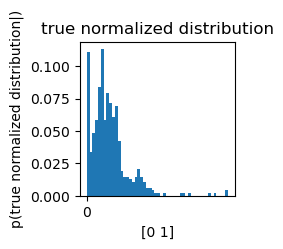

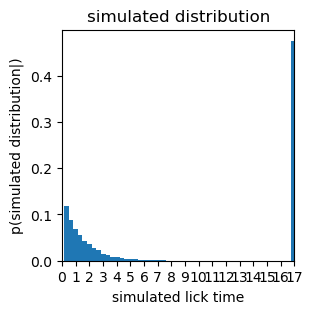

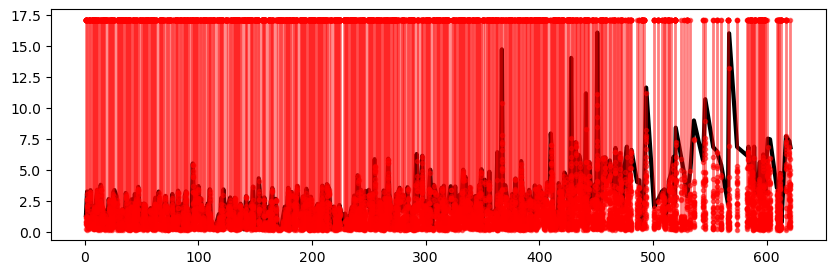

(Any[17.1, 2.07, 17.1, 0.66, 0.58, 0.28, 17.1, 0.27, 0.44999999999999996, 2.06  …  4.78, 0.21, 2.46, 1.3199999999999998, 0.29000000000000004, 1.5799999999999998, 17.1, 17.1, 2.9299999999999997, 0.4], ([1, 2, 4, 5, 6, 7, 8, 9, 10, 11  …  601, 603, 609, 610, 611, 612, 613, 617, 620, 621], Any[1.3481129361966697, 3.2381389674781684, 0.7540004898528244, 3.3472173847511333, 1.4867854978443338, 0.9429930949592261, 2.028078395292389, 1.2443334704502564, 2.5515748140286316, 3.380610777390152  …  7.507794155050981, 7.454704659567989, 3.541578927536323, 3.562174852337634, 1.097362550751579, 4.741041596669002, 0.7128886244241874, 7.692157676087962, 7.317031900095146, 6.805033206369345], Array{Any,1}[[0.24, 0.6, 0.63, 0.74, 0.78, 0.86, 1.0899999999999999, 1.15, 1.23, 17.1  …  17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1], [0.16999999999999998, 0.47, 0.48, 0.57, 0.59, 0.66, 0.6900000000000001, 0.8200000000000001, 1.08, 1.0899999999999999  …  2.61, 2.61, 3.06, 17.1, 17.1, 17.1, 17.1, 1

In [171]:
(movement_positions01, sim_data01,censor_count01) = sim_behavior5(df, pp01, edges01; showTrials=false, nsims=30, ndp_per_sample = 1, p_scaling=1.0)

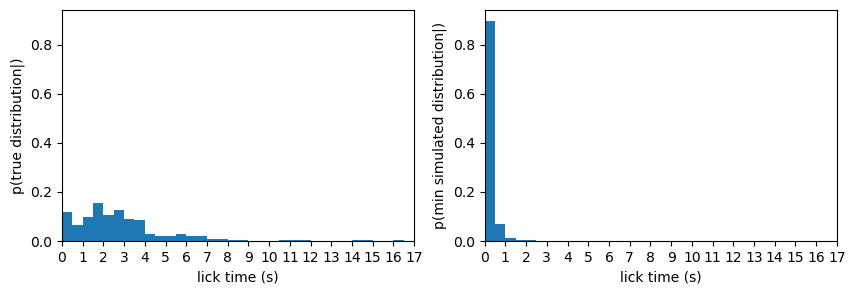

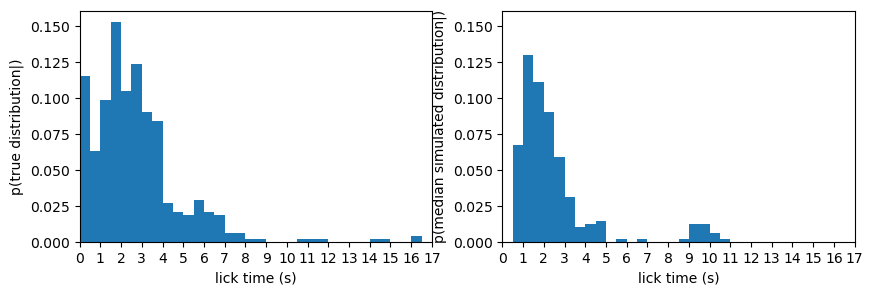

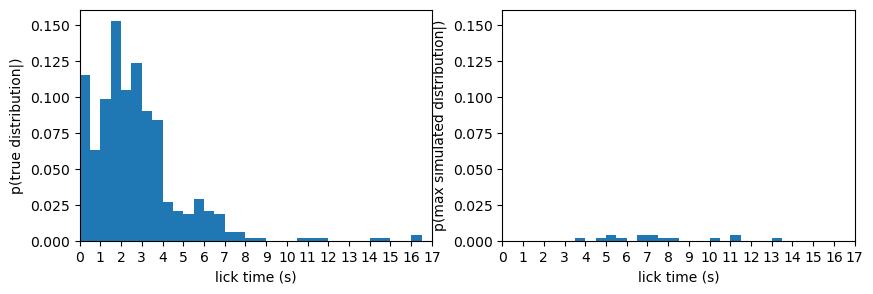

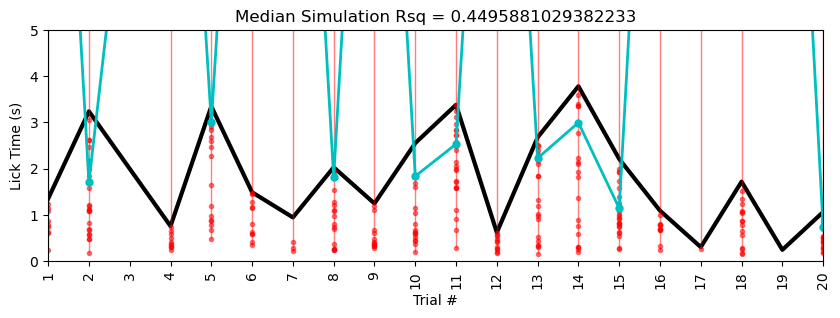

(477,)
(477,)


(0.0, 5.0)

In [172]:
plot_sim_fit2(sim_data01, xl=[1,20])
ylim([0,5])

[:Y]
actual lick-time=3.2381389674781684 found lick time at=2.31
actual lick-time=3.3472173847511333 found lick time at=3.33
actual lick-time=3.380610777390152 found lick time at=3.0
actual lick-time=2.675150362836499 found lick time at=1.46
actual lick-time=3.7821313307982405 found lick time at=1.49
actual lick-time=2.2081427669776397 found lick time at=1.89
actual lick-time=1.06016990984824 found lick time at=0.22999999999999998
actual lick-time=2.6281596606199153 found lick time at=1.19
actual lick-time=3.1629538439316343 found lick time at=1.8699999999999999
actual lick-time=3.358315188891645 found lick time at=2.88
actual lick-time=2.849415881907788 found lick time at=0.79
actual lick-time=1.2546314328509123 found lick time at=0.32
actual lick-time=0.52314616768667 found lick time at=0.2
actual lick-time=1.8010233213905542 found lick time at=0.21
actual lick-time=0.21281757064399948 found lick time at=0.21
actual lick-time=3.121162113024119 found lick time at=1.0
actual lick-time=

actual lick-time=0.928475967380826 found lick time at=0.44999999999999996
actual lick-time=1.6843464075889507 found lick time at=0.5
actual lick-time=5.69455293079573 found lick time at=2.1599999999999997
actual lick-time=3.5532766129817284 found lick time at=1.6099999999999999
actual lick-time=3.3747119445587086 found lick time at=1.7
actual lick-time=2.7364382361530226 found lick time at=0.49
actual lick-time=2.4713906796079925 found lick time at=1.5899999999999999
actual lick-time=3.5535765536341746 found lick time at=0.43999999999999995
actual lick-time=1.9989841520050997 found lick time at=2.0
actual lick-time=2.7826290966297496 found lick time at=2.29
actual lick-time=2.6539545567302953 found lick time at=0.99
actual lick-time=2.59256670319629 found lick time at=2.21
actual lick-time=3.3334201147386042 found lick time at=0.9500000000000001
actual lick-time=7.924711661951312 found lick time at=4.57
actual lick-time=6.406712019920683 found lick time at=4.0600000000000005
actual lic

actual lick-time=3.5887695901878716 found lick time at=3.4299999999999997
actual lick-time=1.8591118277476506 found lick time at=0.16
actual lick-time=2.8340189284155457 found lick time at=1.97
actual lick-time=2.8740110154083833 found lick time at=1.43
actual lick-time=1.6890454778106092 found lick time at=1.5599999999999998
actual lick-time=3.533880450790202 found lick time at=1.15
actual lick-time=1.7066419960874577 found lick time at=1.69
actual lick-time=4.8349230208846885 found lick time at=4.4
actual lick-time=1.415599582997083 found lick time at=0.37
actual lick-time=1.6934446073798213 found lick time at=1.5399999999999998
actual lick-time=6.418109764713642 found lick time at=2.27
actual lick-time=14.713968310290364 found lick time at=7.3100000000000005
actual lick-time=2.5549741414230223 found lick time at=1.52
actual lick-time=3.7480380766368464 found lick time at=0.29000000000000004
actual lick-time=3.0892684236473316 found lick time at=0.47
actual lick-time=2.55467420077057

actual lick-time=2.1263589490772876 found lick time at=1.7899999999999998
actual lick-time=1.3723081488273365 found lick time at=0.37
actual lick-time=3.036978769904196 found lick time at=0.16
actual lick-time=1.7724289791906755 found lick time at=0.21
actual lick-time=3.3084250603680805 found lick time at=2.98
actual lick-time=2.233537742218091 found lick time at=0.5599999999999999
actual lick-time=0.6657979419901213 found lick time at=0.36
actual lick-time=2.8772103823678106 found lick time at=2.42
actual lick-time=5.5038906560573775 found lick time at=4.45
actual lick-time=2.666352103698075 found lick time at=0.16999999999999998
actual lick-time=3.6079657919444337 found lick time at=1.89
actual lick-time=3.678151904616863 found lick time at=1.68
actual lick-time=1.1738474171253805 found lick time at=0.8200000000000001
actual lick-time=1.8981041125656672 found lick time at=1.68
actual lick-time=1.8206194440170447 found lick time at=1.25
actual lick-time=3.4241021719948628 found lick 

actual lick-time=1.7724289791906755 found lick time at=1.4
actual lick-time=1.4519923821605651 found lick time at=0.91
actual lick-time=3.3084250603680805 found lick time at=1.24
actual lick-time=2.233537742218091 found lick time at=0.22999999999999998
actual lick-time=2.8772103823678106 found lick time at=0.32999999999999996
actual lick-time=3.2457374640068077 found lick time at=0.84
actual lick-time=5.5038906560573775 found lick time at=1.3599999999999999
actual lick-time=1.4768874563136065 found lick time at=0.61
actual lick-time=3.678151904616863 found lick time at=2.4499999999999997
actual lick-time=1.3887049044943998 found lick time at=1.23
actual lick-time=2.2644316294200584 found lick time at=0.32
actual lick-time=0.9562904638843446 found lick time at=0.2
actual lick-time=2.758433883999083 found lick time at=0.31
actual lick-time=1.7750284648452097 found lick time at=1.3299999999999998
actual lick-time=1.364709652298697 found lick time at=1.05
actual lick-time=1.525977743097314

actual lick-time=4.8805140000565235 found lick time at=3.76
actual lick-time=4.643660864841443 found lick time at=2.39
actual lick-time=2.8509155851700196 found lick time at=1.3099999999999998
actual lick-time=11.161771163369059 found lick time at=3.7199999999999998
actual lick-time=3.905406938953662 found lick time at=3.21
actual lick-time=5.605870477889112 found lick time at=4.0
actual lick-time=3.829321993449789 found lick time at=2.83
actual lick-time=16.07 found lick time at=6.58
actual lick-time=6.352822682697834 found lick time at=2.4899999999999998
actual lick-time=1.9623913924066536 found lick time at=0.88
actual lick-time=3.49988717684629 found lick time at=0.5
actual lick-time=5.966899043216952 found lick time at=3.11
actual lick-time=5.99209405802244 found lick time at=4.07
actual lick-time=5.228845077764137 found lick time at=4.57
actual lick-time=3.943899322684268 found lick time at=0.62
actual lick-time=3.2476370881389673 found lick time at=1.02
actual lick-time=6.755143

actual lick-time=1.2445334308852207 found lick time at=0.36
actual lick-time=1.9757887415492539 found lick time at=1.8599999999999999
actual lick-time=2.669251530005056 found lick time at=0.5599999999999999
actual lick-time=1.9444949334773587 found lick time at=1.9
actual lick-time=4.548079776928561 found lick time at=3.96
actual lick-time=4.311326621930963 found lick time at=0.39
actual lick-time=3.3722124391216566 found lick time at=1.0999999999999999
actual lick-time=1.3939038758034688 found lick time at=1.39
actual lick-time=1.3309163387897496 found lick time at=0.52
actual lick-time=3.2870292938269126 found lick time at=0.41000000000000003
actual lick-time=2.0960649431802127 found lick time at=0.54
actual lick-time=3.375811726951012 found lick time at=2.85
actual lick-time=1.5572715511692097 found lick time at=0.37
actual lick-time=3.105265258444466 found lick time at=2.67
actual lick-time=5.851421892025134 found lick time at=2.9499999999999997
actual lick-time=2.55867340946986 fo

actual lick-time=5.322226600892413 found lick time at=0.37
actual lick-time=6.858222682069818 found lick time at=0.7000000000000001
actual lick-time=3.8174243475694194 found lick time at=1.0
actual lick-time=5.615668539202358 found lick time at=4.430000000000001
actual lick-time=2.6427567723723007 found lick time at=1.3399999999999999
actual lick-time=6.232546481066876 found lick time at=0.74
actual lick-time=3.8225233386610062 found lick time at=3.28
actual lick-time=7.507794155050981 found lick time at=3.86
actual lick-time=7.454704659567989 found lick time at=1.46
actual lick-time=3.562174852337634 found lick time at=0.75
actual lick-time=1.097362550751579 found lick time at=0.79
actual lick-time=4.741041596669002 found lick time at=1.45
actual lick-time=7.317031900095146 found lick time at=1.19
actual lick-time=6.805033206369345 found lick time at=2.87
actual lick-time=3.2381389674781684 found lick time at=2.6
actual lick-time=0.7540004898528244 found lick time at=0.51
actual lick-

actual lick-time=0.52314616768667 found lick time at=0.4
actual lick-time=1.8010233213905542 found lick time at=0.31
actual lick-time=3.121162113024119 found lick time at=1.02
actual lick-time=1.9815875941632153 found lick time at=0.64
actual lick-time=3.6169640115178217 found lick time at=2.61
actual lick-time=1.9263985141130997 found lick time at=0.68
actual lick-time=2.2160412041587247 found lick time at=0.65
actual lick-time=0.4057493963191957 found lick time at=0.4
actual lick-time=1.7917251611647194 found lick time at=1.43
actual lick-time=2.7329389285411496 found lick time at=0.8300000000000001
actual lick-time=2.19624512109727 found lick time at=1.39
actual lick-time=3.236239343346009 found lick time at=0.24
actual lick-time=1.8719092955853587 found lick time at=0.36
actual lick-time=2.876510520845436 found lick time at=0.85
actual lick-time=2.1263589490772876 found lick time at=1.3499999999999999
actual lick-time=1.3723081488273365 found lick time at=0.78
actual lick-time=3.03

actual lick-time=1.7396354678565487 found lick time at=0.43000000000000005
actual lick-time=1.0085801176274798 found lick time at=0.7000000000000001
actual lick-time=3.4010067417564995 found lick time at=1.45
actual lick-time=3.33082062908407 found lick time at=2.87
actual lick-time=2.9003058126061743 found lick time at=2.09
actual lick-time=4.768336196041614 found lick time at=2.63
actual lick-time=3.587369867143122 found lick time at=0.81
actual lick-time=2.8625132903979424 found lick time at=0.35
actual lick-time=14.024904651403775 found lick time at=2.87
actual lick-time=4.14216009395126 found lick time at=1.7899999999999998
actual lick-time=2.6553542797750445 found lick time at=1.17
actual lick-time=3.52948132122099 found lick time at=0.99
actual lick-time=6.173558152752441 found lick time at=2.51
actual lick-time=4.8805140000565235 found lick time at=1.04
actual lick-time=4.643660864841443 found lick time at=1.26
actual lick-time=1.8918053588642953 found lick time at=1.6099999999

actual lick-time=3.195847335483243 found lick time at=1.3699999999999999
actual lick-time=2.5510749129412207 found lick time at=1.14
actual lick-time=2.8098237157848795 found lick time at=1.6199999999999999
actual lick-time=1.8269181977184166 found lick time at=0.22999999999999998
actual lick-time=1.5730684255313805 found lick time at=1.48
actual lick-time=2.7985259512094025 found lick time at=2.51
actual lick-time=1.8263183164135237 found lick time at=0.37
actual lick-time=1.927798237157849 found lick time at=1.5399999999999998
actual lick-time=3.7085458907314197 found lick time at=1.5999999999999999
actual lick-time=0.24055208297353226 found lick time at=0.2
actual lick-time=2.1970449628371274 found lick time at=0.5599999999999999
actual lick-time=3.4746921620408022 found lick time at=0.37
actual lick-time=2.0177804328917337 found lick time at=0.18
actual lick-time=1.6707490980113862 found lick time at=0.39
actual lick-time=0.3193664884146667 found lick time at=0.16999999999999998
ac

actual lick-time=6.033085947190099 found lick time at=4.83
actual lick-time=2.303823835108003 found lick time at=0.32
actual lick-time=8.390919416070313 found lick time at=1.02
actual lick-time=5.925907154049294 found lick time at=1.0999999999999999
actual lick-time=2.853515070824554 found lick time at=2.27
actual lick-time=5.081574217413013 found lick time at=2.46
actual lick-time=8.974104024643367 found lick time at=2.25
actual lick-time=5.7496420306283635 found lick time at=2.23
actual lick-time=6.814531327030142 found lick time at=1.68
actual lick-time=6.515990397628611 found lick time at=0.3
actual lick-time=5.39281263443477 found lick time at=0.98
actual lick-time=2.246035269403353 found lick time at=0.7000000000000001
actual lick-time=16.006712522333835 found lick time at=1.21
actual lick-time=6.835227232048936 found lick time at=6.010000000000001
actual lick-time=6.123668024228875 found lick time at=3.38
actual lick-time=6.853223671195714 found lick time at=6.510000000000001
ac

actual lick-time=5.228845077764137 found lick time at=2.65
actual lick-time=5.747842386713685 found lick time at=0.89
actual lick-time=3.943899322684268 found lick time at=0.39
actual lick-time=6.75514307784578 found lick time at=4.32
actual lick-time=2.9281003130661962 found lick time at=2.39
actual lick-time=3.7317413011872653 found lick time at=0.54
actual lick-time=6.332026797461559 found lick time at=1.0899999999999999
actual lick-time=4.053077720174715 found lick time at=3.17
actual lick-time=1.958692124359816 found lick time at=0.98
actual lick-time=5.144961675296661 found lick time at=3.01
actual lick-time=6.859722385332049 found lick time at=0.32999999999999996
actual lick-time=2.917102489143166 found lick time at=1.05
actual lick-time=5.437403811431785 found lick time at=2.96
actual lick-time=6.599273918791195 found lick time at=3.9
actual lick-time=3.998488521429491 found lick time at=1.2799999999999998
actual lick-time=11.628378838357989 found lick time at=4.550000000000001

actual lick-time=1.5730684255313805 found lick time at=0.9500000000000001
actual lick-time=3.4629944765953975 found lick time at=1.05
actual lick-time=2.7985259512094025 found lick time at=0.27
actual lick-time=0.2671768148890138 found lick time at=0.2
actual lick-time=1.5548720259496396 found lick time at=1.22
actual lick-time=2.053673330967805 found lick time at=0.59
actual lick-time=1.9082021145313586 found lick time at=1.05
actual lick-time=1.927798237157849 found lick time at=0.62
actual lick-time=1.7697295133186588 found lick time at=1.44
actual lick-time=3.4746921620408022 found lick time at=1.3699999999999999
actual lick-time=2.0177804328917337 found lick time at=0.18
actual lick-time=1.4945839548079372 found lick time at=0.26
actual lick-time=2.149554359533133 found lick time at=1.9
actual lick-time=1.79652421160386 found lick time at=1.3099999999999998
actual lick-time=1.4570913732521518 found lick time at=0.53
actual lick-time=1.0053807506680525 found lick time at=0.29000000

actual lick-time=5.322226600892413 found lick time at=1.13
actual lick-time=3.832621340626698 found lick time at=0.19
actual lick-time=6.858222682069818 found lick time at=1.8299999999999998
actual lick-time=3.8174243475694194 found lick time at=0.42000000000000004
actual lick-time=4.432002744431851 found lick time at=3.83
actual lick-time=5.615668539202358 found lick time at=2.6999999999999997
actual lick-time=2.6427567723723007 found lick time at=2.05
actual lick-time=6.232546481066876 found lick time at=2.76
actual lick-time=3.8225233386610062 found lick time at=1.44
actual lick-time=3.1330597589044884 found lick time at=0.9400000000000001
actual lick-time=5.9559012192939225 found lick time at=0.7000000000000001
actual lick-time=7.507794155050981 found lick time at=4.2700000000000005
actual lick-time=7.454704659567989 found lick time at=2.7199999999999998
actual lick-time=3.541578927536323 found lick time at=1.17
actual lick-time=3.562174852337634 found lick time at=1.56999999999999

actual lick-time=2.1000641518794967 found lick time at=0.32999999999999996
actual lick-time=3.6629549115595847 found lick time at=0.32
actual lick-time=2.7107433202601245 found lick time at=0.74
actual lick-time=3.6471580371974137 found lick time at=0.18
actual lick-time=1.9903858533016396 found lick time at=0.18
actual lick-time=2.070170066852351 found lick time at=1.42
actual lick-time=2.4389970891437938 found lick time at=0.42000000000000004
actual lick-time=2.9818896700715625 found lick time at=0.85
actual lick-time=2.173349651293871 found lick time at=0.35
actual lick-time=3.325421697340037 found lick time at=2.32
actual lick-time=2.617261816914367 found lick time at=1.42
actual lick-time=1.8591118277476506 found lick time at=1.8399999999999999
actual lick-time=2.8340189284155457 found lick time at=1.5499999999999998
actual lick-time=1.4907847065436175 found lick time at=1.4
actual lick-time=1.6890454778106092 found lick time at=0.49
actual lick-time=3.757936118167574 found lick t

actual lick-time=3.2456374837893263 found lick time at=3.15
actual lick-time=3.54237876927618 found lick time at=0.15
actual lick-time=1.6901452602029121 found lick time at=0.5
actual lick-time=1.8297176438079152 found lick time at=0.9
actual lick-time=3.588669609970389 found lick time at=1.42
actual lick-time=4.57667411912844 found lick time at=0.2
actual lick-time=6.265639933053449 found lick time at=4.6000000000000005
actual lick-time=4.231042507292842 found lick time at=2.87
actual lick-time=6.1223682814016085 found lick time at=1.03
actual lick-time=1.9263985141130997 found lick time at=1.47
actual lick-time=2.3414163968812702 found lick time at=0.9600000000000001
actual lick-time=2.4642920841667633 found lick time at=1.5799999999999998
actual lick-time=3.5792714695270726 found lick time at=0.73
actual lick-time=5.0034896675594975 found lick time at=2.56
actual lick-time=3.775132715574494 found lick time at=3.03
actual lick-time=2.7707314507493805 found lick time at=1.47
actual li

actual lick-time=2.55867340946986 found lick time at=1.5
actual lick-time=2.4429962978430777 found lick time at=1.8599999999999999
actual lick-time=1.6293572879737992 found lick time at=0.6
actual lick-time=3.323722033642841 found lick time at=1.24
actual lick-time=2.8069242894778985 found lick time at=1.74
actual lick-time=3.1387586313009677 found lick time at=0.19
actual lick-time=2.6992455952496837 found lick time at=1.7799999999999998
actual lick-time=5.888314592276027 found lick time at=5.3500000000000005
actual lick-time=2.4587931722052487 found lick time at=0.67
actual lick-time=3.0370787501216783 found lick time at=2.35
actual lick-time=1.969689948282846 found lick time at=0.53
actual lick-time=3.54237876927618 found lick time at=0.36
actual lick-time=2.4074033404194526 found lick time at=2.1799999999999997
actual lick-time=1.9584921639248516 found lick time at=1.64
actual lick-time=2.197144943054609 found lick time at=0.77
actual lick-time=4.57667411912844 found lick time at=0

actual lick-time=4.548079776928561 found lick time at=1.7899999999999998
actual lick-time=4.311326621930963 found lick time at=1.03
actual lick-time=3.3722124391216566 found lick time at=1.5499999999999998
actual lick-time=1.3939038758034688 found lick time at=0.33999999999999997
actual lick-time=2.1840475345644546 found lick time at=0.26
actual lick-time=3.2870292938269126 found lick time at=0.16
actual lick-time=3.105265258444466 found lick time at=1.0999999999999999
actual lick-time=5.851421892025134 found lick time at=1.89
actual lick-time=2.55867340946986 found lick time at=0.79
actual lick-time=1.7382357448117993 found lick time at=1.6099999999999999
actual lick-time=1.6293572879737992 found lick time at=1.38
actual lick-time=3.323722033642841 found lick time at=0.38
actual lick-time=2.8069242894778985 found lick time at=2.1999999999999997
actual lick-time=5.888314592276027 found lick time at=5.58
actual lick-time=3.0713719647180366 found lick time at=1.95
actual lick-time=2.4587

actual lick-time=2.4587931722052487 found lick time at=2.07
actual lick-time=3.0370787501216783 found lick time at=0.88
actual lick-time=1.969689948282846 found lick time at=0.7100000000000001
actual lick-time=3.2456374837893263 found lick time at=1.38
actual lick-time=3.54237876927618 found lick time at=0.76
actual lick-time=1.8297176438079152 found lick time at=0.2
actual lick-time=3.588669609970389 found lick time at=2.64
actual lick-time=1.9584921639248516 found lick time at=1.5299999999999998
actual lick-time=2.197144943054609 found lick time at=0.85
actual lick-time=4.57667411912844 found lick time at=0.9500000000000001
actual lick-time=6.265639933053449 found lick time at=0.26
actual lick-time=6.1223682814016085 found lick time at=5.11
actual lick-time=2.3414163968812702 found lick time at=0.81
actual lick-time=2.4642920841667633 found lick time at=2.3
actual lick-time=5.0034896675594975 found lick time at=4.300000000000001
actual lick-time=3.1272609062905268 found lick time at=

actual lick-time=1.969689948282846 found lick time at=0.47
actual lick-time=3.2456374837893263 found lick time at=2.37
actual lick-time=1.8297176438079152 found lick time at=0.86
actual lick-time=2.4074033404194526 found lick time at=1.92
actual lick-time=3.588669609970389 found lick time at=1.24
actual lick-time=1.9584921639248516 found lick time at=0.9400000000000001
actual lick-time=1.3302164772673748 found lick time at=0.9600000000000001
actual lick-time=4.57667411912844 found lick time at=0.59
actual lick-time=6.265639933053449 found lick time at=4.680000000000001
actual lick-time=2.578169551878868 found lick time at=1.6099999999999999
actual lick-time=4.231042507292842 found lick time at=2.98
actual lick-time=6.1223682814016085 found lick time at=4.16
actual lick-time=2.3414163968812702 found lick time at=1.02
actual lick-time=0.35184006305285076 found lick time at=0.21
actual lick-time=3.775132715574494 found lick time at=3.34
actual lick-time=3.1272609062905268 found lick time 

actual lick-time=5.9559012192939225 found lick time at=1.3399999999999999
actual lick-time=7.507794155050981 found lick time at=5.04
actual lick-time=7.454704659567989 found lick time at=3.36
actual lick-time=3.541578927536323 found lick time at=3.21
actual lick-time=3.562174852337634 found lick time at=2.48
actual lick-time=1.097362550751579 found lick time at=0.51
actual lick-time=4.741041596669002 found lick time at=2.63
actual lick-time=7.692157676087962 found lick time at=5.32
actual lick-time=7.317031900095146 found lick time at=5.9
actual lick-time=6.805033206369345 found lick time at=1.0899999999999999
actual lick-time=3.2381389674781684 found lick time at=1.48
actual lick-time=0.7540004898528244 found lick time at=0.31
actual lick-time=3.3472173847511333 found lick time at=0.7100000000000001
actual lick-time=2.028078395292389 found lick time at=0.48
actual lick-time=2.5515748140286316 found lick time at=1.6099999999999999
actual lick-time=3.380610777390152 found lick time at=3

actual lick-time=0.5803848421951687 found lick time at=0.35
actual lick-time=3.5792714695270726 found lick time at=0.64
actual lick-time=5.0034896675594975 found lick time at=1.7899999999999998
actual lick-time=3.775132715574494 found lick time at=1.26
actual lick-time=3.1272609062905268 found lick time at=2.17
actual lick-time=2.7707314507493805 found lick time at=2.28
actual lick-time=3.7051465633370286 found lick time at=0.44999999999999996
actual lick-time=1.6480535886429508 found lick time at=0.33999999999999997
actual lick-time=3.6629549115595847 found lick time at=0.97
actual lick-time=1.6345562592828682 found lick time at=0.41000000000000003
actual lick-time=2.7107433202601245 found lick time at=0.15
actual lick-time=3.6471580371974137 found lick time at=1.7
actual lick-time=2.070170066852351 found lick time at=0.59
actual lick-time=2.9818896700715625 found lick time at=0.31
actual lick-time=4.9994904588602145 found lick time at=0.51
actual lick-time=1.4865855374093695 found li

actual lick-time=3.358315188891645 found lick time at=3.29
actual lick-time=2.849415881907788 found lick time at=1.1099999999999999
actual lick-time=1.2546314328509123 found lick time at=0.6900000000000001
actual lick-time=0.52314616768667 found lick time at=0.43999999999999995
actual lick-time=1.8010233213905542 found lick time at=1.66
actual lick-time=0.5919325573143506 found lick time at=0.2
actual lick-time=2.42400005652148 found lick time at=0.9500000000000001
actual lick-time=2.054573152925144 found lick time at=0.62
actual lick-time=1.9815875941632153 found lick time at=0.29000000000000004
actual lick-time=2.605764091903926 found lick time at=0.19
actual lick-time=2.0391761994329016 found lick time at=0.63
actual lick-time=3.6169640115178217 found lick time at=2.98
actual lick-time=2.2392366146145704 found lick time at=2.19
actual lick-time=2.2160412041587247 found lick time at=2.08
actual lick-time=0.8361342385143643 found lick time at=0.24
actual lick-time=0.4057493963191957 f

actual lick-time=2.2392366146145704 found lick time at=0.43000000000000005
actual lick-time=2.262332044852934 found lick time at=0.41000000000000003
actual lick-time=2.2160412041587247 found lick time at=0.28
actual lick-time=1.7917251611647194 found lick time at=0.85
actual lick-time=2.7329389285411496 found lick time at=2.73
actual lick-time=2.19624512109727 found lick time at=1.68
actual lick-time=3.236239343346009 found lick time at=0.22999999999999998
actual lick-time=1.8719092955853587 found lick time at=0.16999999999999998
actual lick-time=2.876510520845436 found lick time at=1.01
actual lick-time=2.1263589490772876 found lick time at=1.17
actual lick-time=1.3723081488273365 found lick time at=0.52
actual lick-time=3.036978769904196 found lick time at=1.88
actual lick-time=1.7724289791906755 found lick time at=0.15
actual lick-time=3.3084250603680805 found lick time at=3.25
actual lick-time=2.233537742218091 found lick time at=0.67
actual lick-time=1.4579911952094908 found lick 

actual lick-time=2.683848641757441 found lick time at=0.87
actual lick-time=0.790753217799242 found lick time at=0.16999999999999998
actual lick-time=3.3747119445587086 found lick time at=2.15
actual lick-time=2.7364382361530226 found lick time at=0.55
actual lick-time=2.4713906796079925 found lick time at=0.81
actual lick-time=0.9593698545827932 found lick time at=0.29000000000000004
actual lick-time=3.731441360534819 found lick time at=3.2399999999999998
actual lick-time=1.4989830843771492 found lick time at=0.78
actual lick-time=3.405705811978158 found lick time at=3.01
actual lick-time=1.9989841520050997 found lick time at=0.6
actual lick-time=2.7826290966297496 found lick time at=1.05
actual lick-time=2.59256670319629 found lick time at=2.31
actual lick-time=3.968894377054791 found lick time at=2.98
actual lick-time=3.3334201147386042 found lick time at=2.03
actual lick-time=7.924711661951312 found lick time at=1.03
actual lick-time=6.406712019920683 found lick time at=2.469999999

actual lick-time=5.5038906560573775 found lick time at=0.4
actual lick-time=2.666352103698075 found lick time at=0.38
actual lick-time=3.6079657919444337 found lick time at=1.5399999999999998
actual lick-time=1.4768874563136065 found lick time at=0.24
actual lick-time=3.678151904616863 found lick time at=2.53
actual lick-time=1.1738474171253805 found lick time at=0.4
actual lick-time=1.3887049044943998 found lick time at=1.2
actual lick-time=1.8981041125656672 found lick time at=0.22
actual lick-time=1.8206194440170447 found lick time at=0.32
actual lick-time=3.4241021719948628 found lick time at=2.17
actual lick-time=1.0534712352769398 found lick time at=0.7000000000000001
actual lick-time=3.4107048228522623 found lick time at=1.13
actual lick-time=0.37000646856934716 found lick time at=0.16
actual lick-time=2.1439554673541354 found lick time at=0.29000000000000004
actual lick-time=2.758433883999083 found lick time at=1.2799999999999998
actual lick-time=0.1849430860099917 found lick t

actual lick-time=0.4785050005809153 found lick time at=0.18
actual lick-time=1.9263985141130997 found lick time at=1.8299999999999998
actual lick-time=2.262332044852934 found lick time at=1.98
actual lick-time=2.2160412041587247 found lick time at=1.27
actual lick-time=1.7917251611647194 found lick time at=1.21
actual lick-time=1.902103321264951 found lick time at=0.6900000000000001
actual lick-time=2.7329389285411496 found lick time at=0.49
actual lick-time=1.6502531534275569 found lick time at=1.23
actual lick-time=2.876510520845436 found lick time at=2.87
actual lick-time=3.036978769904196 found lick time at=1.0899999999999999
actual lick-time=1.7724289791906755 found lick time at=0.62
actual lick-time=1.4519923821605651 found lick time at=1.0
actual lick-time=3.3084250603680805 found lick time at=1.46
actual lick-time=2.233537742218091 found lick time at=0.32
actual lick-time=2.8772103823678106 found lick time at=0.4
actual lick-time=3.2457374640068077 found lick time at=1.64
actua

actual lick-time=2.0391761994329016 found lick time at=2.04
actual lick-time=3.0400781566461412 found lick time at=2.7399999999999998
actual lick-time=2.082367653385166 found lick time at=0.9400000000000001
actual lick-time=3.6169640115178217 found lick time at=0.32
actual lick-time=0.4785050005809153 found lick time at=0.29000000000000004
actual lick-time=2.2392366146145704 found lick time at=0.62
actual lick-time=1.9263985141130997 found lick time at=0.48
actual lick-time=2.262332044852934 found lick time at=1.95
actual lick-time=2.2160412041587247 found lick time at=0.79
actual lick-time=1.902103321264951 found lick time at=1.5399999999999998
actual lick-time=1.4173992269117606 found lick time at=0.21
actual lick-time=2.05437319249018 found lick time at=0.7000000000000001
actual lick-time=2.7329389285411496 found lick time at=0.99
actual lick-time=2.19624512109727 found lick time at=0.54
actual lick-time=3.236239343346009 found lick time at=0.99
actual lick-time=1.6502531534275569 f

actual lick-time=0.52314616768667 found lick time at=0.48
actual lick-time=2.42400005652148 found lick time at=0.44999999999999996
actual lick-time=2.054573152925144 found lick time at=1.2899999999999998
actual lick-time=2.605764091903926 found lick time at=0.33999999999999997
actual lick-time=2.0391761994329016 found lick time at=0.49
actual lick-time=3.0400781566461412 found lick time at=0.76
actual lick-time=2.668851609135127 found lick time at=1.93
actual lick-time=3.6169640115178217 found lick time at=3.3
actual lick-time=1.9263985141130997 found lick time at=0.26
actual lick-time=0.4099985555621847 found lick time at=0.16999999999999998
actual lick-time=1.7917251611647194 found lick time at=0.9
actual lick-time=0.36050834790854824 found lick time at=0.26
actual lick-time=1.4173992269117606 found lick time at=0.84
actual lick-time=2.05437319249018 found lick time at=1.92
actual lick-time=2.7329389285411496 found lick time at=2.73
actual lick-time=2.19624512109727 found lick time a

actual lick-time=4.741041596669002 found lick time at=0.67
actual lick-time=0.7128886244241874 found lick time at=0.57
actual lick-time=7.317031900095146 found lick time at=2.27
actual lick-time=6.805033206369345 found lick time at=3.78
actual lick-time=3.2381389674781684 found lick time at=2.07
actual lick-time=0.7540004898528244 found lick time at=0.57
actual lick-time=2.5515748140286316 found lick time at=0.53
actual lick-time=3.380610777390152 found lick time at=2.79
actual lick-time=0.6166076749889312 found lick time at=0.32999999999999996
actual lick-time=2.675150362836499 found lick time at=0.43000000000000005
actual lick-time=2.2081427669776397 found lick time at=1.27
actual lick-time=2.6281596606199153 found lick time at=0.6900000000000001
actual lick-time=1.992985338956174 found lick time at=0.43000000000000005
actual lick-time=3.1629538439316343 found lick time at=2.3
actual lick-time=2.849415881907788 found lick time at=0.88
actual lick-time=0.2841234617522287 found lick ti

actual lick-time=1.0165785350260472 found lick time at=0.85
actual lick-time=2.7707314507493805 found lick time at=1.3299999999999998
actual lick-time=3.53617999579229 found lick time at=3.36
actual lick-time=2.1000641518794967 found lick time at=0.32
actual lick-time=3.6629549115595847 found lick time at=0.97
actual lick-time=1.6345562592828682 found lick time at=0.32
actual lick-time=2.7107433202601245 found lick time at=1.06
actual lick-time=3.6471580371974137 found lick time at=0.26
actual lick-time=1.9903858533016396 found lick time at=0.6
actual lick-time=2.070170066852351 found lick time at=0.7000000000000001
actual lick-time=2.4389970891437938 found lick time at=0.52
actual lick-time=3.325421697340037 found lick time at=2.65
actual lick-time=1.4865855374093695 found lick time at=0.38
actual lick-time=2.617261816914367 found lick time at=2.42
actual lick-time=1.1835454982211435 found lick time at=0.65
actual lick-time=1.8591118277476506 found lick time at=0.98
actual lick-time=2

actual lick-time=2.197144943054609 found lick time at=0.29000000000000004
actual lick-time=4.57667411912844 found lick time at=0.48
actual lick-time=6.265639933053449 found lick time at=2.4899999999999998
actual lick-time=4.231042507292842 found lick time at=2.81
actual lick-time=6.1223682814016085 found lick time at=3.53
actual lick-time=2.4642920841667633 found lick time at=1.26
actual lick-time=3.5792714695270726 found lick time at=0.62
actual lick-time=5.0034896675594975 found lick time at=0.8
actual lick-time=2.7707314507493805 found lick time at=1.3599999999999999
actual lick-time=3.7051465633370286 found lick time at=1.3599999999999999
actual lick-time=0.6288252575652431 found lick time at=0.51
actual lick-time=1.6480535886429508 found lick time at=1.64
actual lick-time=2.1000641518794967 found lick time at=2.03
actual lick-time=3.6629549115595847 found lick time at=1.5499999999999998
actual lick-time=1.6345562592828682 found lick time at=0.77
actual lick-time=3.6471580371974137

actual lick-time=2.3414163968812702 found lick time at=0.41000000000000003
actual lick-time=0.5803848421951687 found lick time at=0.58
actual lick-time=3.5792714695270726 found lick time at=0.54
actual lick-time=5.0034896675594975 found lick time at=0.43999999999999995
actual lick-time=3.775132715574494 found lick time at=2.0
actual lick-time=3.1272609062905268 found lick time at=2.31
actual lick-time=2.434797920009546 found lick time at=1.6199999999999999
actual lick-time=2.7707314507493805 found lick time at=2.6799999999999997
actual lick-time=3.53617999579229 found lick time at=0.7000000000000001
actual lick-time=3.7051465633370286 found lick time at=1.72
actual lick-time=1.6480535886429508 found lick time at=1.64
actual lick-time=3.6629549115595847 found lick time at=1.95
actual lick-time=1.6345562592828682 found lick time at=1.13
actual lick-time=2.7107433202601245 found lick time at=2.08
actual lick-time=3.6471580371974137 found lick time at=0.88
actual lick-time=2.43899708914379

actual lick-time=4.9994904588602145 found lick time at=3.65
actual lick-time=1.4865855374093695 found lick time at=1.04
actual lick-time=4.424004327033283 found lick time at=0.9500000000000001
actual lick-time=2.8433170886413808 found lick time at=1.52
actual lick-time=1.8591118277476506 found lick time at=1.3099999999999998
actual lick-time=2.8740110154083833 found lick time at=1.44
actual lick-time=1.4907847065436175 found lick time at=0.74
actual lick-time=1.6890454778106092 found lick time at=1.17
actual lick-time=3.757936118167574 found lick time at=3.01
actual lick-time=5.039282585418087 found lick time at=0.77
actual lick-time=4.191150400517486 found lick time at=1.46
actual lick-time=4.8349230208846885 found lick time at=3.88
actual lick-time=6.418109764713642 found lick time at=0.87
actual lick-time=3.3328202334337114 found lick time at=1.48
actual lick-time=1.743234755685904 found lick time at=1.69
actual lick-time=14.713968310290364 found lick time at=0.55
actual lick-time=3

actual lick-time=4.9994904588602145 found lick time at=2.2399999999999998
actual lick-time=4.424004327033283 found lick time at=2.64
actual lick-time=3.5887695901878716 found lick time at=2.02
actual lick-time=1.8591118277476506 found lick time at=1.68
actual lick-time=2.8740110154083833 found lick time at=1.47
actual lick-time=1.6890454778106092 found lick time at=1.3699999999999999
actual lick-time=3.757936118167574 found lick time at=0.4
actual lick-time=3.533880450790202 found lick time at=0.31
actual lick-time=5.039282585418087 found lick time at=0.24
actual lick-time=1.8648107001441299 found lick time at=1.75
actual lick-time=1.7066419960874577 found lick time at=0.81
actual lick-time=4.8349230208846885 found lick time at=0.84
actual lick-time=1.5563717292118708 found lick time at=0.7000000000000001
actual lick-time=1.6934446073798213 found lick time at=0.65
actual lick-time=6.418109764713642 found lick time at=2.39
actual lick-time=3.3328202334337114 found lick time at=1.6099999

actual lick-time=1.8010233213905542 found lick time at=0.36
actual lick-time=3.121162113024119 found lick time at=2.5
actual lick-time=2.054573152925144 found lick time at=0.2
actual lick-time=1.9815875941632153 found lick time at=0.5
actual lick-time=2.605764091903926 found lick time at=1.8699999999999999
actual lick-time=2.0391761994329016 found lick time at=0.57
actual lick-time=2.668851609135127 found lick time at=2.1599999999999997
actual lick-time=2.082367653385166 found lick time at=1.0
actual lick-time=1.9263985141130997 found lick time at=0.81
actual lick-time=2.262332044852934 found lick time at=1.15
actual lick-time=2.2160412041587247 found lick time at=1.42
actual lick-time=1.7917251611647194 found lick time at=1.5599999999999998
actual lick-time=1.902103321264951 found lick time at=1.65
actual lick-time=2.05437319249018 found lick time at=0.49
actual lick-time=2.7329389285411496 found lick time at=2.73
actual lick-time=2.19624512109727 found lick time at=0.91
actual lick-t

actual lick-time=1.8010233213905542 found lick time at=1.6199999999999999
actual lick-time=0.5919325573143506 found lick time at=0.41000000000000003
actual lick-time=1.9815875941632153 found lick time at=0.32999999999999996
actual lick-time=2.0391761994329016 found lick time at=1.72
actual lick-time=3.0400781566461412 found lick time at=1.9
actual lick-time=2.668851609135127 found lick time at=1.73
actual lick-time=2.082367653385166 found lick time at=1.23
actual lick-time=1.9263985141130997 found lick time at=0.43999999999999995
actual lick-time=2.262332044852934 found lick time at=1.47
actual lick-time=2.2160412041587247 found lick time at=0.3
actual lick-time=0.8361342385143643 found lick time at=0.36
actual lick-time=2.05437319249018 found lick time at=0.66
actual lick-time=2.7329389285411496 found lick time at=0.32999999999999996
actual lick-time=2.19624512109727 found lick time at=1.04
actual lick-time=3.236239343346009 found lick time at=0.84
actual lick-time=1.6502531534275569 

actual lick-time=3.533880450790202 found lick time at=3.29
actual lick-time=5.039282585418087 found lick time at=0.25
actual lick-time=4.191150400517486 found lick time at=0.44999999999999996
actual lick-time=4.8349230208846885 found lick time at=1.49
actual lick-time=1.72393857371186 found lick time at=1.3599999999999999
actual lick-time=1.415599582997083 found lick time at=0.15
actual lick-time=1.6934446073798213 found lick time at=0.9600000000000001
actual lick-time=6.418109764713642 found lick time at=0.57
actual lick-time=3.3328202334337114 found lick time at=0.85
actual lick-time=1.743234755685904 found lick time at=0.3
actual lick-time=14.713968310290364 found lick time at=0.68
actual lick-time=2.5549741414230223 found lick time at=1.5
actual lick-time=3.0892684236473316 found lick time at=1.74
actual lick-time=2.5546742007705765 found lick time at=0.5599999999999999
actual lick-time=0.928475967380826 found lick time at=0.58
actual lick-time=4.288131211475117 found lick time at=

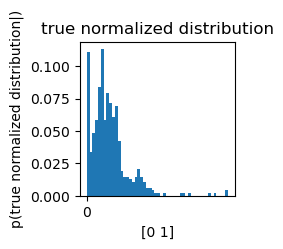

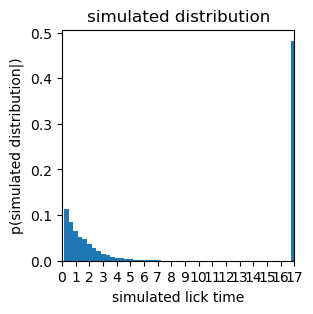

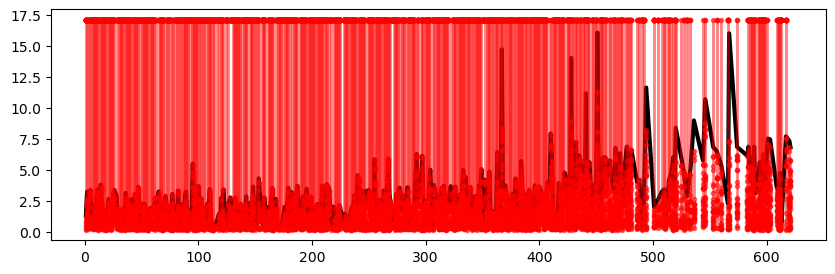

(Any[17.1, 2.31, 17.1, 3.33, 17.1, 17.1, 17.1, 17.1, 17.1, 3.0  …  2.25, 2.82, 17.1, 1.19, 0.86, 1.15, 17.1, 5.340000000000001, 1.2799999999999998, 0.86], ([1, 2, 4, 5, 6, 7, 8, 9, 10, 11  …  601, 603, 609, 610, 611, 612, 613, 617, 620, 621], Any[1.3481129361966697, 3.2381389674781684, 0.7540004898528244, 3.3472173847511333, 1.4867854978443338, 0.9429930949592261, 2.028078395292389, 1.2443334704502564, 2.5515748140286316, 3.380610777390152  …  7.507794155050981, 7.454704659567989, 3.541578927536323, 3.562174852337634, 1.097362550751579, 4.741041596669002, 0.7128886244241874, 7.692157676087962, 7.317031900095146, 6.805033206369345], Array{Any,1}[[0.16, 0.19, 0.41000000000000003, 0.43000000000000005, 0.6, 0.76, 0.8300000000000001, 1.0899999999999999, 1.19, 17.1  …  17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1, 17.1], [0.32, 0.49, 0.57, 0.59, 0.68, 0.68, 0.81, 0.9, 1.08, 1.16  …  2.21, 2.28, 2.3, 2.31, 2.57, 2.6, 17.1, 17.1, 17.1, 17.1], [0.21, 0.31, 0.4, 0.43000000000000005, 0.45

In [173]:
(movement_positions001, sim_data001,censor_count001) = sim_behavior5(df, pp001, edges001; showTrials=false, nsims=30, ndp_per_sample = 1, p_scaling=1.0)

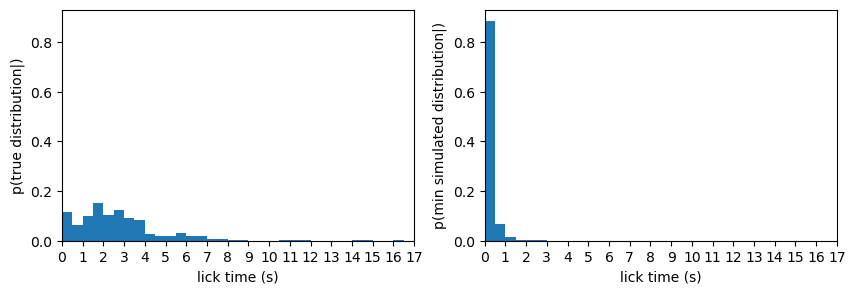

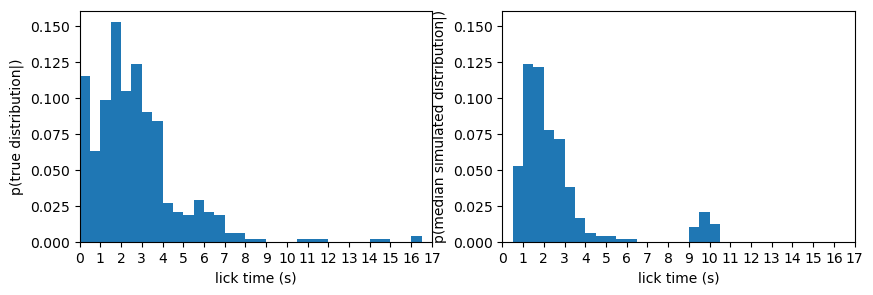

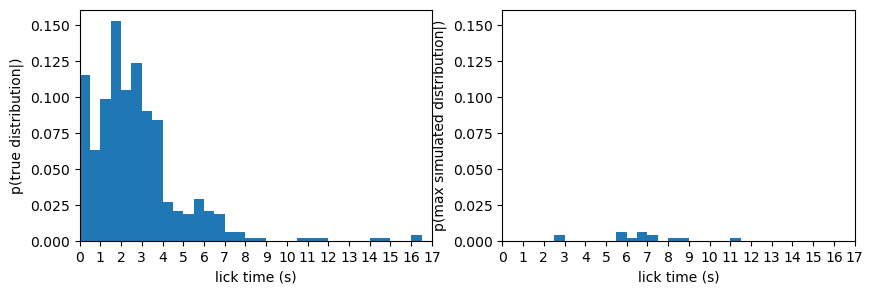

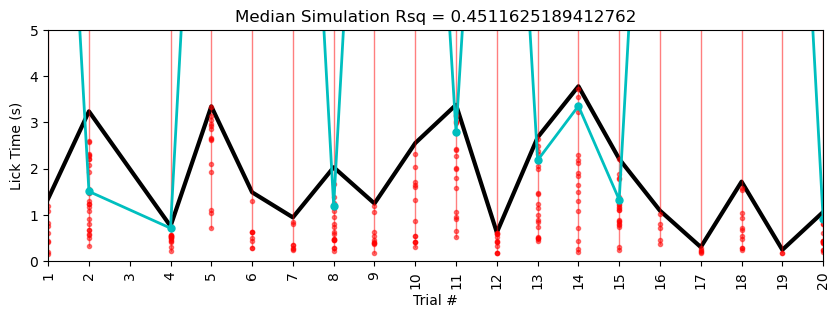

(477,)
(477,)


(0.0, 5.0)

In [174]:
plot_sim_fit2(sim_data001, xl=[1,20])
ylim([0,5])

In [175]:
function sim_behavior4v2(collated_results; seshNo=1, nsims=10, ndp_per_sample = 10, 
        p_prior=1.0, censor=true, pre_normalize_p=true, run_with_prior_only=false, uncensormode="last")
    #
    #   ndp_per_sample: the number of samples to average over when making prediction (leave at 1 bc not as 
    #                   well controlled as inserting prior)   
    #.  p_prior: This is a multiplier of the p_model prediction that we get from the logit model
    #.                 This makes sense to apply because our fit assumes == LickState proportions, 
    #                  and we must correct this
    #   censor: If true, we ignore when the sim goes past the end of a trial. If false, we apply some kind of 
    #                  strategy to include those censored points
    #.  pre-normalize: This sets the model result probability to between 0 to 1. May or may not be correct
    #   
    #.  run_with_prior_only: Here, uses p_prior for every single coin toss. Is a null model
    #.  
    #   uncensormode: "last" or "uniformprior" -- if we uncensor, should we use the last predicted prob 
    #                  OR an uninformative prior when there's no data?
    #                 "uniformscaling" uses p_prior not the true prior
    #
    #  This function originally from "Adding history predictors to the design matrix 2-2-2021.ipynb"
    #    Here we will continue to fuss with it to make it as good as possible
    #
    pprior_star = get_prior(collated_results, seshNo, :LickState)
    println("pprior_star=", pprior_star)
    yID = collated_results.results[seshNo].modelData[1].yID[1]
    th = collated_results.results[seshNo].modelData[1].th_means[1]
    df = collated_results.results[seshNo].modelData[1].df[1]
    X = df.X
    predictors = collated_results.results[seshNo].modelData[1].predictors # must be a vector
    println(predictors)
    # Let's get the range of probabilities the model can do on the whole dataset...
    all_p,_ = predict_logit(yID, predictors, th, df,plotOn=false)
    min_p = minimum(all_p)
    max_p = maximum(all_p)
    

    trialIDs = unique(df.TrialNo)
    movement_positions = []
    true_move_times_by_trial = []
    movement_positions_by_trial = [[] for _=1:length(trialIDs)]
    for ss = 1:nsims
        for ii =1:length(trialIDs)
            i = trialIDs[ii]
            # get the datapoints corresponding to this trial
            dps = findall(x->x==i, df.TrialNo)
            nj = ceil(Int,length(dps)/ndp_per_sample) 
            
            foundlick=false;
            for j = 1:nj
                mn = ndp_per_sample*(j-1)+1
                mx = round(Int,minimum([ndp_per_sample*(j), length(dps)]))
                if ss==1 && j==1
                    push!(true_move_times_by_trial,df.LickTime[dps[mx]]*maximum(X)+minimum(X)+0.15)
                end
                if run_with_prior_only
                    # Use the p_prior for every coin toss
                    if ss==1 && ii==1 && j==1
                        warning(join(["using the prior=", p_prior, " for every coin toss"]))
                    end
                    p_corrected = p_prior
                else
                    # Average the signals within this time window...
                    dpsrange = dps[mn:mx]

                    # make an average dataframe of this set
                    avedf = average_df(predictors[1], dpsrange, df, yID)

                    # look at the DA signal and predictors at that time
                    # calculate its p(move | dopamine, factors) from the model 
                    prediction_p,_ = predict_logit(yID, predictors, th, avedf,plotOn=false)
                    p = prediction_p[1]

                    # Let's correct this p for our uncertainty. 
                    #. If it's close to min prediction on our dataset, let's set to zero. 
                    #. If it's close to max set close to 1
                    if pre_normalize_p
                        p_corrected = (p-min_p)/max_p
                    else 
                        p_corrected = p
                    end
                    #
                    # Scale everything by the prior... (p_prior)
                    #
                    p_corrected = p_corrected*p_prior
                end

                state = flip(p_corrected)
                if state
                    #
                    # Get the current time in the trial...
                    #
                    move_time_i = df.X[dps[mx]]+0.15# add 0.15 to account for trimming back from lick.
                    push!(movement_positions, move_time_i)
                    push!(movement_positions_by_trial[ii], move_time_i)
                    foundlick = true
                    break
                elseif j == nj && !censor
                    if uncensormode =="last"
                        p_uncensor = p_corrected
                    elseif uncensormode == "uniformscaling"
                        p_uncensor = p_prior
                    elseif uncensormode == "uniformprior"
                        p_uncensor = pprior_star
                    else
                        error("undefined uncensormode. Use last or uniformprior")
                    end
                    warning(join(["Found censored trial! ", i, " true lick time=", df.LickTime[dps[mx]]*maximum(X)+minimum(X)+0.15, " current time=", df.X[dps[mx]]]))
                    tt = 1
                    while tt <10000
                        time_i = df.X[dps[mx]]+0.15 + tt*0.01
#                         println("     time = ", time_i)
                        state = flip(p_uncensor)
                        if state
                            foundlick = true
                            push!(movement_positions, time_i)
                            push!(movement_positions_by_trial[ii], time_i)
                            println("      On trial ", i, " found lick after time at ", time_i)
                            break
                        end
                        tt = tt+1
                    end
                    if !foundlick
                        println("      On trial ", i, " never found a lick...")
                        push!(movement_positions, 21.1)
                        push!(movement_positions_by_trial[ii], 21.1)
                    end
                    break
                else
                    continue
                end
            end
        end
    end
    extract_behavior_distribution(df)
    figure(figsize=(3,3))
    render_distribution(movement_positions, [0,1], t="simulated distribution", bins=50, ax=gca())
    xlim([0,maximum(X)])
    xticks(0:17)
    xlabel("simulated lick time")
    sim_data = (trialIDs, true_move_times_by_trial, movement_positions_by_trial)
    plot_sim_fit2v2(sim_data; xl=[300,400])
    return (movement_positions, sim_data)
end

sim_behavior4v2 (generic function with 1 method)